<a href="https://colab.research.google.com/github/chielgroen1998/MLOps/blob/main/datacollection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install alpha_vantage
!pip install xgboost
!pip install pandas_ta==0.3.14b0
!pip install optuna
!pip install --upgrade pyspark==3.3.0 delta-spark==2.2.0
!pip install --upgrade numpy
!pip install --upgrade pandas_ta


In [2]:
import pandas as pd
import numpy as np
np.NaN = np.nan
import pandas_ta as ta
import optuna
import logging
from datetime import timedelta
from alpha_vantage.timeseries import TimeSeries

add more data visualizations and insights

after engineering move to pyspark, describe in report why

transforming (remove nulls after cuz its about loading the data in first)

removing rows or mean imputation without a rolling window is not smart because of the timeseries nature of stocks, it would ruin indications of growing or shrinking trends in price


In [3]:
import matplotlib.pyplot as plt

In [4]:

# api_key = '832OZZOS1E3Z1RJR'
# symbols = ['LIT', 'REMX', 'URA', 'GDX', 'GDXJ', 'XLE', 'ICLN', 'SPY', 'GLD', 'CPER', 'USO', 'UNG', 'KOL', 'JJN']

# ts = TimeSeries(key=api_key, output_format='pandas')
# all_data = {}
# for symbol in symbols:
#     data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
#     # Filter data from 2018 onwards
#     data.index = pd.to_datetime(data.index)
#     data = data[data.index >= '2012-01-01']
#     all_data[symbol] = data
#     print(f"Data for {symbol}:")
#     print(data.head())  # Print the first few rows of the dataset
#     # Plot the data
#     data['4. close'].plot(figsize=(12, 6), title=f'{symbol} Daily Closing Price (from 2018)')
#     plt.xlabel('Date')
#     plt.ylabel('Closing Price')
#     plt.grid(True)
#     plt.show()

In [5]:
!pip install yfinance


[*********************100%***********************]  1 of 1 completed

Data for LIT:
Price           Close       High        Low       Open   Volume
Ticker            LIT        LIT        LIT        LIT      LIT
Date                                                           
2022-01-03  83.434250  83.560471  82.579811  82.968188   907100
2022-01-04  83.007042  83.181814  81.871025  83.084720  1311600
2022-01-05  79.094086  81.696248  79.006703  81.463221  1206100
2022-01-06  78.725121  79.424210  77.579392  79.045538   985200
2022-01-07  78.666855  79.433911  77.773577  78.802796   810900


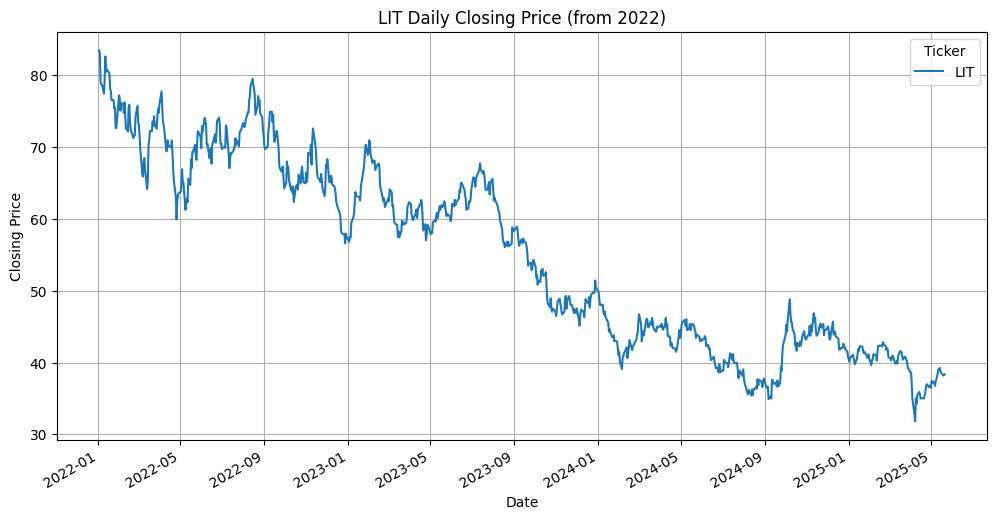

[*********************100%***********************]  1 of 1 completed

Data for REMX:
Price            Close        High         Low        Open  Volume
Ticker            REMX        REMX        REMX        REMX    REMX
Date                                                              
2022-01-03  108.702347  109.009958  107.279639  108.625442  192000
2022-01-04  112.432144  112.682081  110.797959  111.249765  257400
2022-01-05  107.846809  112.239891  107.231586  111.490089  206700
2022-01-06  106.625969  108.144804  105.347455  107.097005  217900
2022-01-07  105.520485  106.702871  104.088169  106.193390  252800


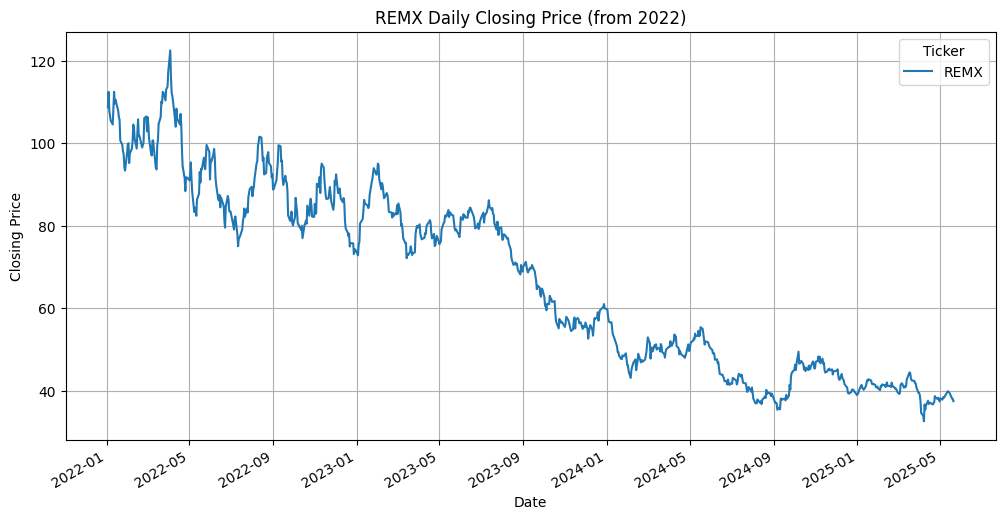

[*********************100%***********************]  1 of 1 completed

Data for URA:
Price           Close       High        Low       Open   Volume
Ticker            URA        URA        URA        URA      URA
Date                                                           
2022-01-03  21.997784  22.361834  21.451707  21.570024  1745500
2022-01-04  22.389139  22.552962  21.843062  22.434645  1704500
2022-01-05  22.525658  24.000065  22.334532  22.907911  7939800
2022-01-06  21.287884  23.035329  21.178669  23.008026  3863000
2022-01-07  22.034187  22.079695  21.087656  21.469909  1962300


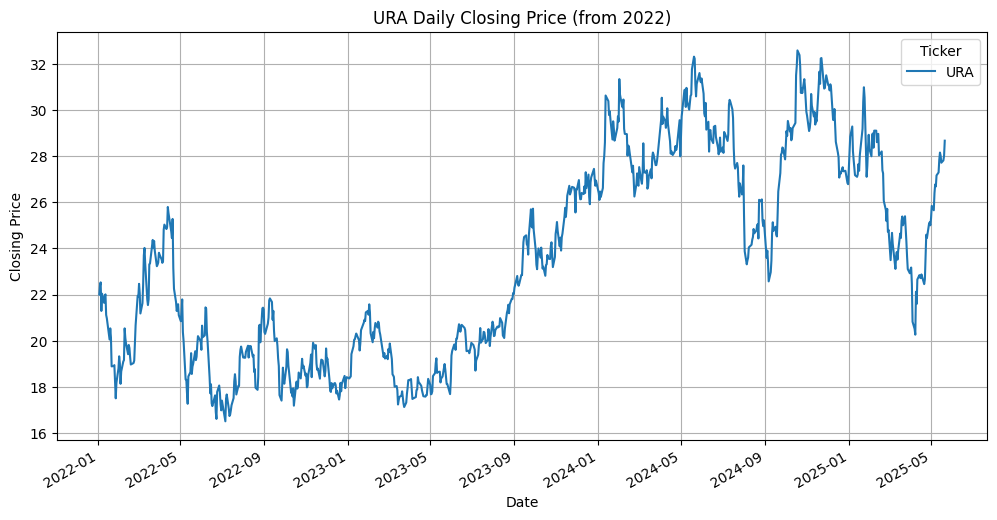

[*********************100%***********************]  1 of 1 completed

Data for GDX:
Price           Close       High        Low       Open    Volume
Ticker            GDX        GDX        GDX        GDX       GDX
Date                                                            
2022-01-03  29.882631  30.150380  29.844381  30.045193  18828900
2022-01-04  30.006941  30.475502  29.940004  30.064317  15468300
2022-01-05  29.500132  30.628498  29.442757  30.322500  26211100
2022-01-06  28.457827  29.050697  28.438701  28.849887  28579300
2022-01-07  28.696888  28.849887  28.323953  28.649075  19982900


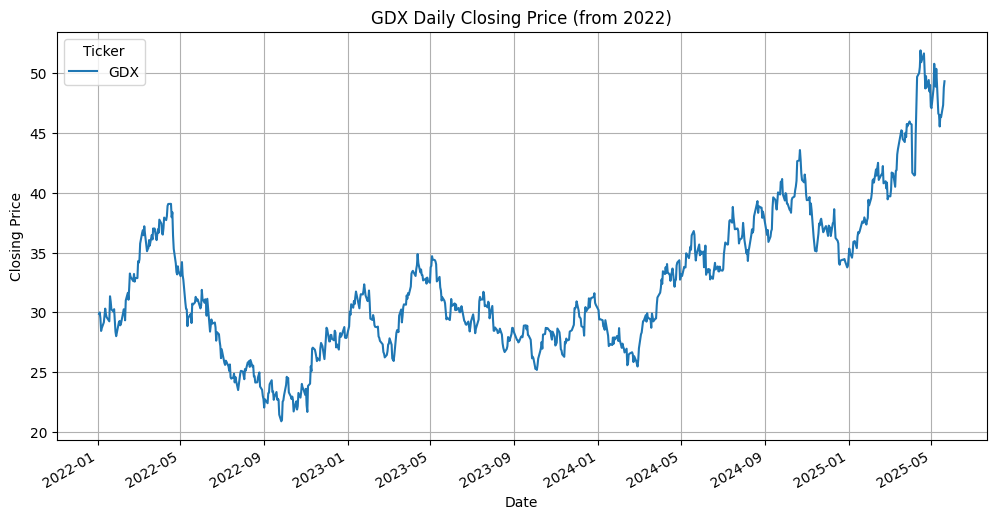

[*********************100%***********************]  1 of 1 completed

Data for GDXJ:
Price           Close       High        Low       Open   Volume
Ticker           GDXJ       GDXJ       GDXJ       GDXJ     GDXJ
Date                                                           
2022-01-03  39.501720  39.944589  39.424702  39.732783  6289900
2022-01-04  39.819431  40.464474  39.597999  39.800176  4475800
2022-01-05  38.818169  40.647399  38.702639  40.098631  8230100
2022-01-06  37.325901  38.298279  37.325901  37.932436  9988900
2022-01-07  37.778397  37.951689  37.191117  37.643608  5560100


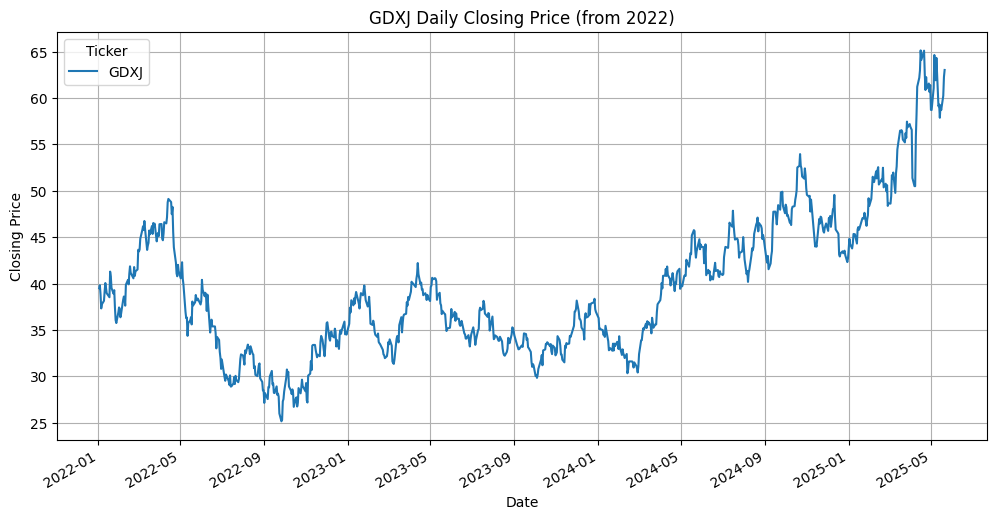

[*********************100%***********************]  1 of 1 completed

Data for XLE:
Price           Close       High        Low       Open    Volume
Ticker            XLE        XLE        XLE        XLE       XLE
Date                                                            
2022-01-03  50.839958  50.919923  49.356162  49.382819  32527100
2022-01-04  52.599194  52.803548  51.364179  51.532993  39978800
2022-01-05  52.590302  53.700926  52.510336  53.114517  45402000
2022-01-06  53.763123  54.065213  53.007899  53.825321  37340700
2022-01-07  54.500576  54.642736  53.594306  53.967478  35584600


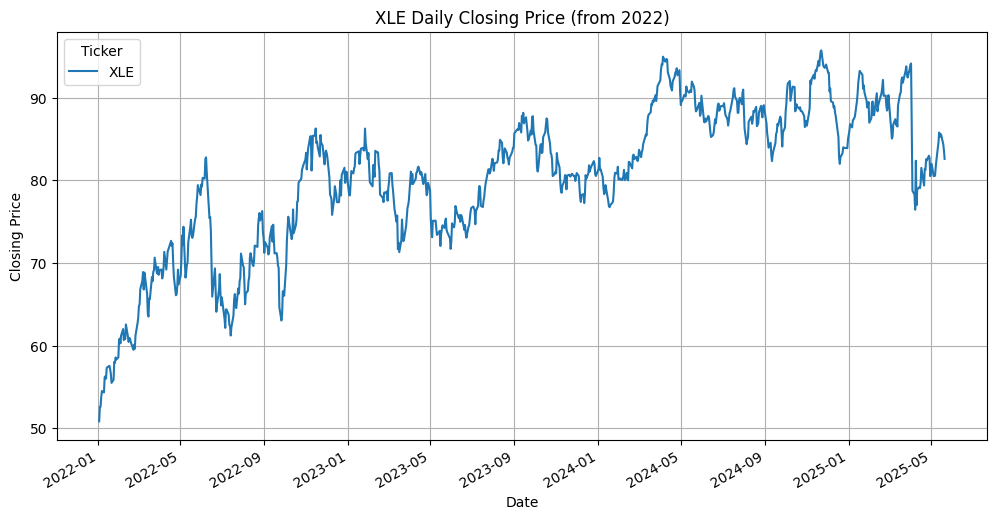

[*********************100%***********************]  1 of 1 completed

Data for ICLN:
Price           Close       High        Low       Open   Volume
Ticker           ICLN       ICLN       ICLN       ICLN     ICLN
Date                                                           
2022-01-03  20.514784  20.630142  20.284065  20.543624  4360300
2022-01-04  20.197546  20.534012  19.947600  20.534012  5200200
2022-01-05  19.255442  20.034118  19.255442  20.034118  7501900
2022-01-06  18.986271  19.226603  18.745938  19.120857  7642400
2022-01-07  18.899750  19.178536  18.803616  18.928590  4522100


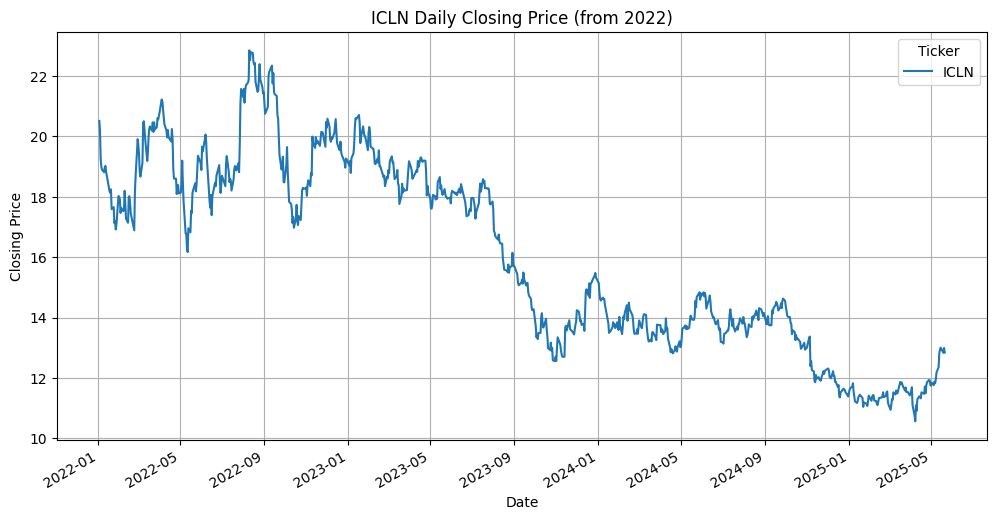

[*********************100%***********************]  1 of 1 completed

Data for SPY:
Price            Close        High         Low        Open     Volume
Ticker             SPY         SPY         SPY         SPY        SPY
Date                                                                 
2022-01-03  455.810455  455.944051  452.127422  454.465090   72668200
2022-01-04  455.657745  457.976369  453.778055  457.251201   71178700
2022-01-05  446.908112  456.068026  446.812690  455.285610  104538900
2022-01-06  446.488342  449.236320  444.093398  446.440646   86858900
2022-01-07  444.723083  447.690527  443.349095  446.497831   85111600


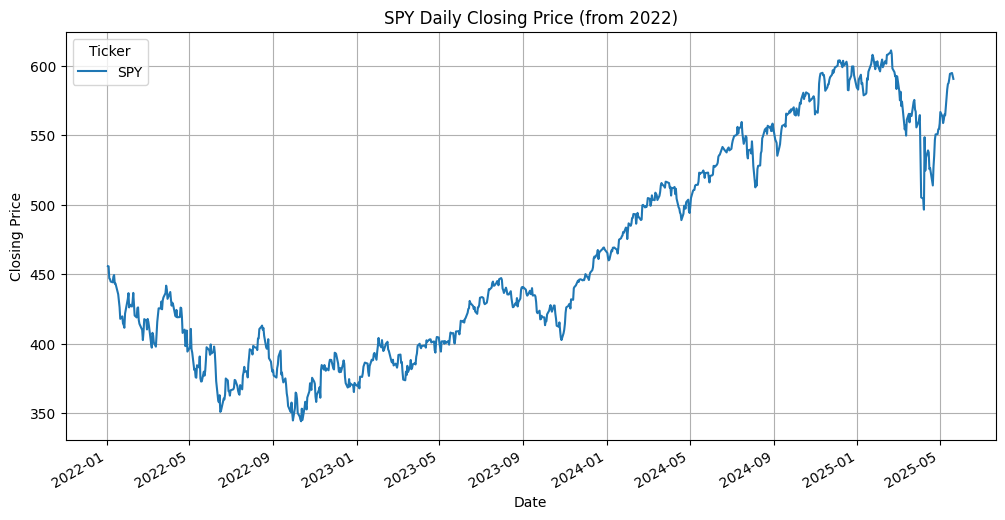

[*********************100%***********************]  1 of 1 completed

Data for GLD:
Price            Close        High         Low        Open    Volume
Ticker             GLD         GLD         GLD         GLD       GLD
Date                                                                
2022-01-03  168.330002  169.009995  168.000000  168.860001   9014400
2022-01-04  169.570007  169.720001  168.729996  168.899994   6965600
2022-01-05  169.059998  170.929993  168.899994  170.619995   8715600
2022-01-06  166.990005  167.750000  166.860001  167.160004  10902700
2022-01-07  167.750000  168.009995  166.860001  167.369995   8191900


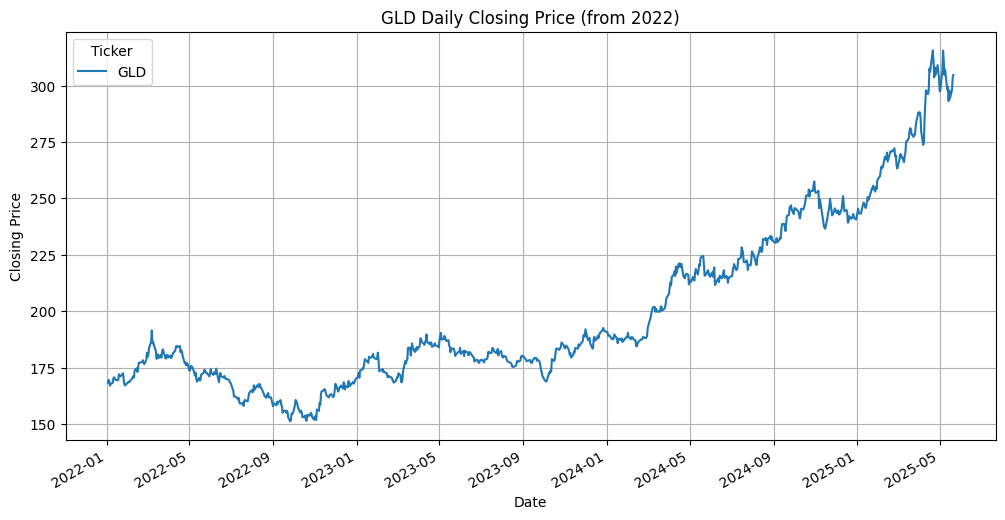

[*********************100%***********************]  1 of 1 completed

Data for CPER:
Price           Close       High        Low       Open  Volume
Ticker           CPER       CPER       CPER       CPER    CPER
Date                                                          
2022-01-03  26.959999  27.040001  26.459999  26.660000  130200
2022-01-04  27.260000  27.330000  27.010000  27.010000   98400
2022-01-05  26.700001  27.180000  26.680000  27.020000  159300
2022-01-06  26.590000  26.620001  26.360001  26.420000  130900
2022-01-07  26.889999  26.940001  26.570000  26.629999  139400


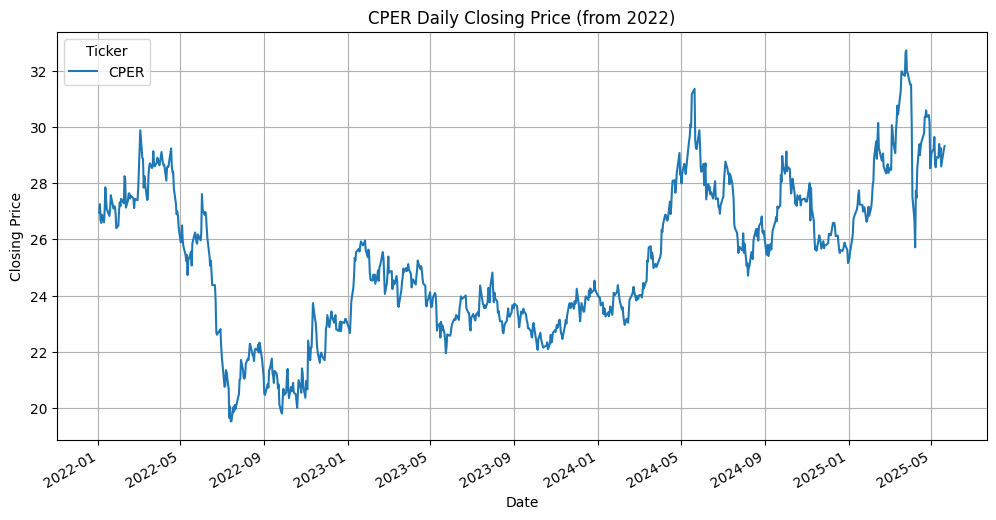

[*********************100%***********************]  1 of 1 completed

Data for USO:
Price           Close       High        Low       Open   Volume
Ticker            USO        USO        USO        USO      USO
Date                                                           
2022-01-03  54.830002  55.160000  53.939999  53.970001  5602900
2022-01-04  55.590000  56.049999  55.250000  55.310001  4857000
2022-01-05  55.430000  56.480000  55.430000  56.160000  5043500
2022-01-06  56.889999  57.310001  56.650002  57.099998  4954400
2022-01-07  56.669998  57.040001  56.369999  56.900002  6023600


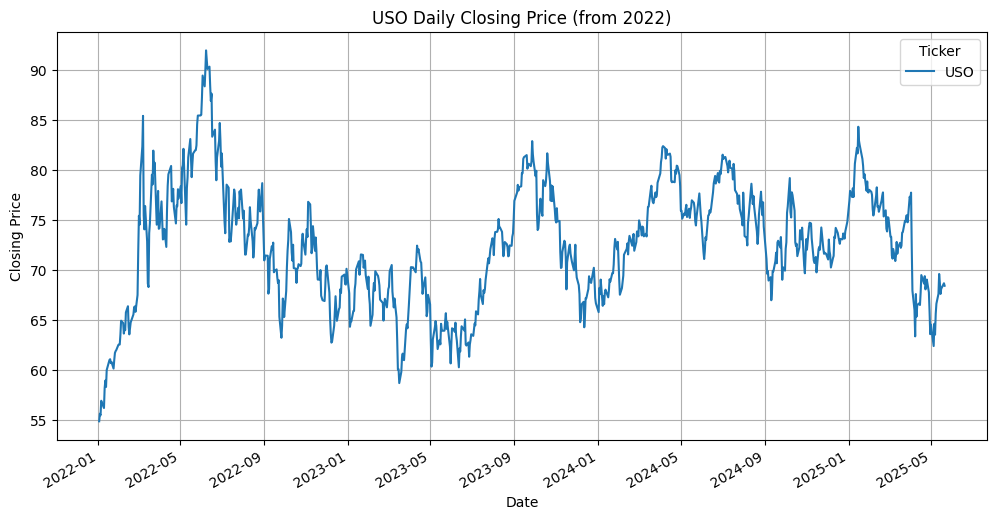

[*********************100%***********************]  1 of 1 completed

Data for UNG:
Price           Close       High        Low       Open   Volume
Ticker            UNG        UNG        UNG        UNG      UNG
Date                                                           
2022-01-03  51.080002  51.240002  48.360001  49.799999  1654075
2022-01-04  49.759998  51.119999  49.279999  50.880001  1883425
2022-01-05  51.200001  51.720001  50.000000  50.959999  1519400
2022-01-06  51.200001  51.520000  50.560001  51.160000  1467700
2022-01-07  52.080002  52.840000  51.400002  51.720001  1744025


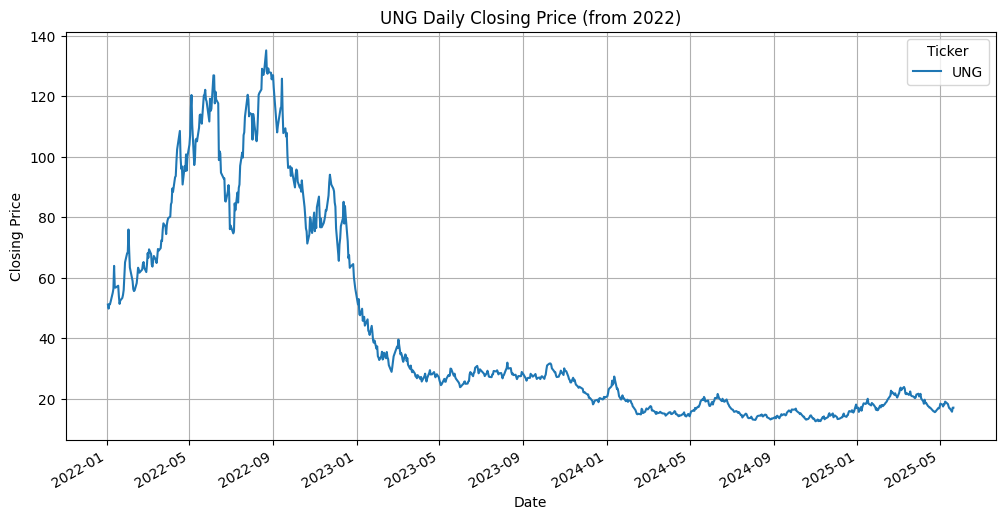

[*********************100%***********************]  1 of 1 completed

Data for JJN:
Price           Close       High    Low       Open Volume
Ticker            JJN        JJN    JJN        JJN    JJN
Date                                                     
2022-01-03  27.310400  27.530001  27.07  27.530001  11781
2022-01-04  27.607100  27.790001  27.49  27.490000   8147
2022-01-05  27.100000  27.420000  26.83  27.150000  34843
2022-01-06  26.969999  27.190001  26.48  26.480000  62830
2022-01-07  27.280100  27.490000  27.00  27.150000  23152


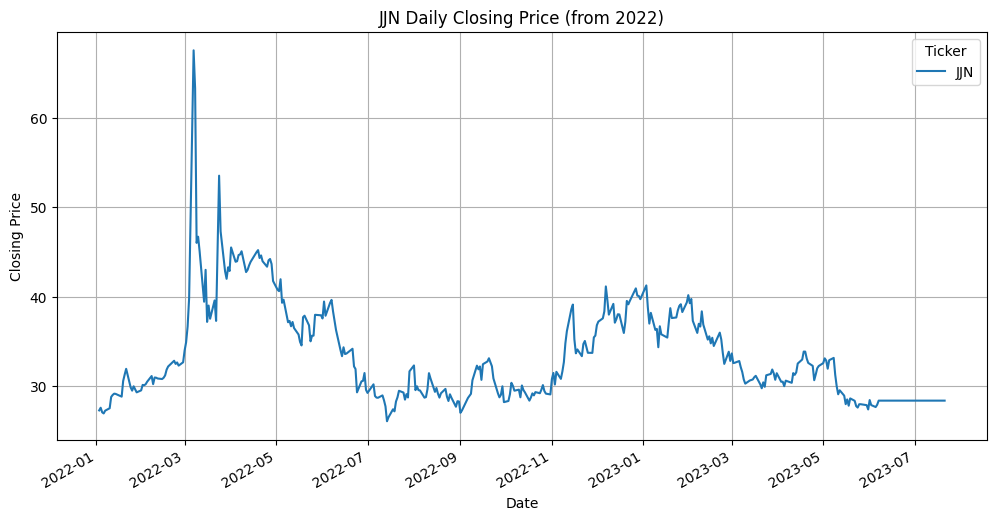

LIT columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
REMX columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
URA columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
GDX columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
GDXJ columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
XLE columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
ICLN columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
SPY columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
GLD columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
CPER columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
USO columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
UNG columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
JJN columns: Index(['Open', 'High', 'Low', 'Clos

In [8]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt

# Define the symbols to fetch data for
symbols = ['LIT', 'REMX', 'URA', 'GDX', 'GDXJ', 'XLE', 'ICLN', 'SPY', 'GLD', 'CPER', 'USO', 'UNG',  'JJN']#'KOL',

# Fetch data from Yahoo Finance
all_data = {}
for symbol in symbols:
    # Download data
    data = yf.download(symbol, start='2022-01-01')
    all_data[symbol] = data
    
    # Print the first few rows of the dataset
    print(f"Data for {symbol}:")
    print(data.head())
    
    # Plot the data
    data['Close'].plot(figsize=(12, 6), title=f'{symbol} Daily Closing Price (from 2022)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.show()

# Adjust column names based on the number of columns
for symbol, df in all_data.items():
    if symbol == 'KOL' and len(df.columns) == 6:
        df.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
    else:
        df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Verify the column names
for symbol, df in all_data.items():
    print(f"{symbol} columns: {df.columns}")

In [9]:
all_data['LIT'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['REMX'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['URA'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['GDX'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['XLE'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['ICLN'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['SPY'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['GLD'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['CPER'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['USO'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['UNG'].columns = ['open', 'high', 'low', 'close', 'volume']
# all_data['KOL'].columns = ['open', 'high', 'low', 'close', 'volume']#
all_data['JJN'].columns = ['open', 'high', 'low', 'close', 'volume']


Data for LIT:
                 open       high        low      close   volume  SMA_100  \
Date                                                                       
2022-01-03  83.434250  83.560471  82.579811  82.968188   907100      NaN   
2022-01-04  83.007042  83.181814  81.871025  83.084720  1311600      NaN   
2022-01-05  79.094086  81.696248  79.006703  81.463221  1206100      NaN   
2022-01-06  78.725121  79.424210  77.579392  79.045538   985200      NaN   
2022-01-07  78.666855  79.433911  77.773577  78.802796   810900      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2022-01-03     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-04     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-06     NaN     NaN     NaN      NaN  ...       0        0  

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_3041/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[70162802.72742516 88854697.55685614 66886379.59431788 60850645.08864541
 67338336.91485612 61150704.16920491 87469425.37205748 43129299.09257992
 40423475.28423349 38747435.64368983 53244427.55085698 47518782.52273933
 36742136.97265695 43887969.31999775 49288776.85732029 83571916.28095104
 49440802.88946962 45345730.15425407 40827994.57894967 62811631.56869908
 31451646.93940901 73631035.48995537 36719819.15415547 36157808.59304184
 28904293.93296967 40779302.28223253 44388540.22611586 81270368.79425564
 47902296.61724699 44513170.42727111 68834032.97108853 48334980.34475268
 38564096.47851358 26187507.28439398 41563429.04519071 44919579.21816
 50419472.41224706 46966489.02335249 30563897.49688708 58468036.41556813
 60831230.6117549  44482929.94597762 44222321.91092829 4824391

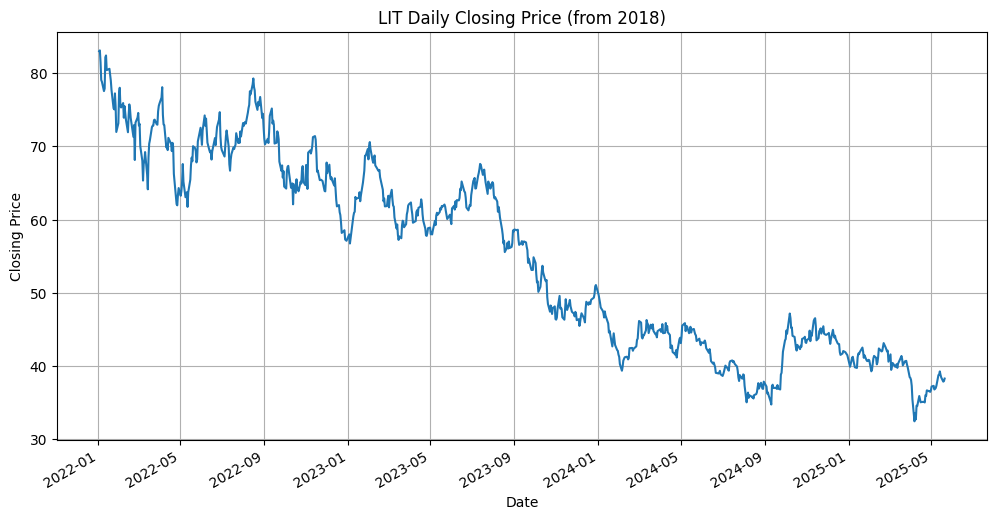

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_3041/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[28719817.2603562  20941853.94532319 30694428.60335031 31526976.93306215
 44298224.09038471 11081540.19186888 16516314.34918687 10516097.25448399
 15995861.53277511  7297463.03146038 14249639.90366977 28875047.81242713
 14837976.72990539 19959076.60796368 17231818.75639801 27546853.22009892
 15552448.25726337 19771272.42305514  8718618.70519489 15620645.04934544
  9034987.7412249   9040942.62972151 13031800.13691935  9086944.00635089
 17813054.14431794 17486973.76672118 25047827.09531074 11958566.97152594
 31809937.10452899  9680218.22145253 14722068.53445393 19397399.11825748
 13678582.28937256 24032296.46499423 28651381.46789085 19732177.05465526
 15934719.4671654  34219596.04071313 22362506.78249794 36813508.12541576
 12014718.02952836 11896786.84589312 20240974.81058794 2233

Number of technical indicators successfully added to LIT: 39

Data for REMX:
                  open        high         low       close  volume  SMA_100  \
Date                                                                          
2022-01-03  108.702347  109.009958  107.279639  108.625442  192000      NaN   
2022-01-04  112.432144  112.682081  110.797959  111.249765  257400      NaN   
2022-01-05  107.846809  112.239891  107.231586  111.490089  206700      NaN   
2022-01-06  106.625969  108.144804  105.347455  107.097005  217900      NaN   
2022-01-07  105.520485  106.702871  104.088169  106.193390  252800      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2022-01-03     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-04     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-05     NaN     NaN     NaN      NaN  ...       0     

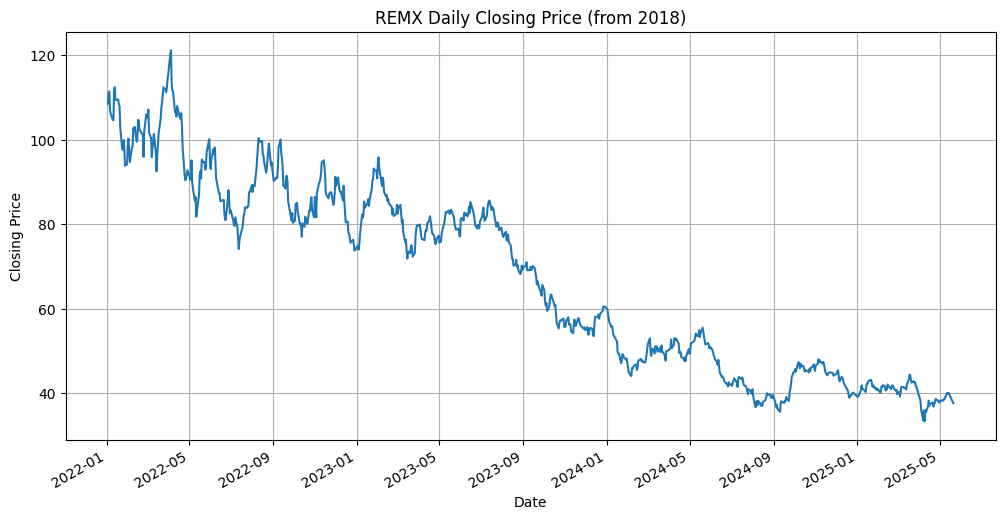

Number of technical indicators successfully added to REMX: 39


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_3041/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.79709588e+07 1.83257222e+08 3.39407405e+07 4.48773663e+07
 4.26173266e+07 3.57515369e+07 6.04579165e+07 5.14345798e+07
 3.32927379e+07 4.37510106e+07 2.15910620e+07 3.14190515e+07
 3.13531575e+07 5.16149395e+07 4.54954746e+07 1.27054646e+07
 1.46968941e+07 2.54802487e+07 5.06976091e+07 1.04697580e+08
 1.06182982e+08 6.86906883e+07 1.10735589e+08 1.32753443e+08
 1.93597783e+08 1.94127155e+08 4.90219509e+07 9.79607263e+07
 5.16707794e+07 9.93561644e+07 1.14485199e+08 9.17337569e+07
 5.01842036e+07 5.31343411e+07 5.12310167e+07 8.12773479e+07
 1.43891388e+08 1.05697947e+08 6.57011105e+07 9.29774908e+07
 7.28724964e+07 5.80477788e+07 6.61305499e+07 3.91576124e+07
 4.22333238e+07 6.73623499e+07 7.42823770e+07 4.60619826e+07
 8.07218970e+07 3.29387937e+07 3.29924408e+07 2.55789566e


Data for URA:
                 open       high        low      close   volume  SMA_100  \
Date                                                                       
2022-01-03  21.997784  22.361834  21.451707  21.570024  1745500      NaN   
2022-01-04  22.389139  22.552962  21.843062  22.434645  1704500      NaN   
2022-01-05  22.525658  24.000065  22.334532  22.907911  7939800      NaN   
2022-01-06  21.287884  23.035329  21.178669  23.008026  3863000      NaN   
2022-01-07  22.034187  22.079695  21.087656  21.469909  1962300      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2022-01-03     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-04     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-06     NaN     NaN     NaN      NaN  ...       0        0  

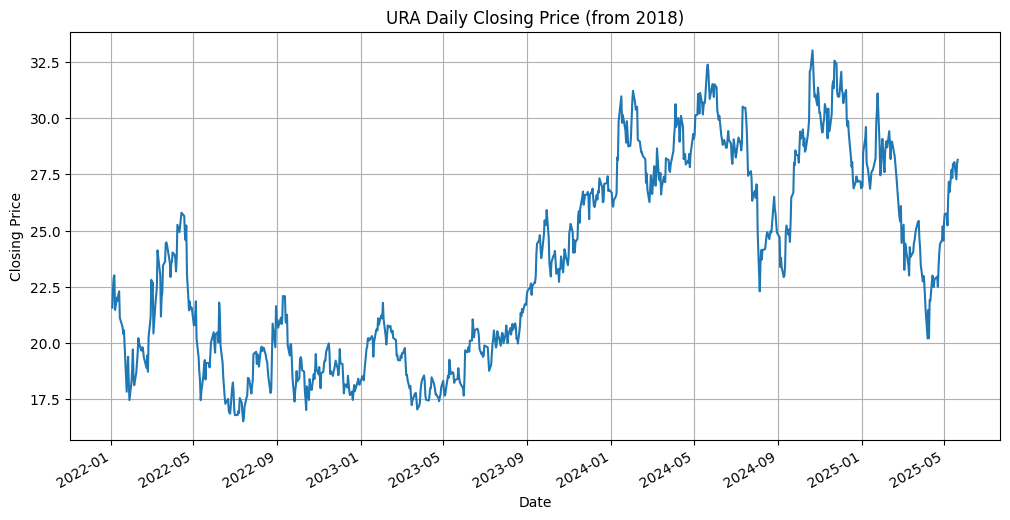

Number of technical indicators successfully added to URA: 39


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_3041/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[4.66523015e+08 6.93051240e+08 5.96238125e+08 5.94726570e+08
 4.62722649e+08 1.59080484e+09 8.30519683e+08 7.97124839e+08
 6.42093342e+08 4.68257928e+08 4.51618159e+08 7.12429891e+08
 4.44736392e+08 5.79365292e+08 1.27361540e+09 9.16515716e+08
 8.99002215e+08 1.48003531e+09 7.77179689e+08 1.72555308e+09
 8.60036449e+08 1.31129842e+09 8.87318715e+08 8.01157845e+08
 1.43067960e+09 1.69661327e+09 2.99399375e+09 1.07647155e+09
 1.01328263e+09 9.55501280e+08 8.92761283e+08 6.22608601e+08
 7.47199083e+08 8.04143622e+08 5.51352038e+08 6.38001621e+08
 7.06094948e+08 6.44176382e+08 8.12368816e+08 7.88969698e+08
 8.53351489e+08 8.80240044e+08 8.40549982e+08 8.44103996e+08
 8.31696034e+08 6.82248488e+08 6.51442952e+08 9.49627325e+08
 1.21980649e+09 4.60661318e+08 4.98062822e+08 9.35449286e


Data for GDX:
                 open       high        low      close    volume  SMA_100  \
Date                                                                        
2022-01-03  29.882631  30.150380  29.844381  30.045193  18828900      NaN   
2022-01-04  30.006941  30.475502  29.940004  30.064317  15468300      NaN   
2022-01-05  29.500132  30.628498  29.442757  30.322500  26211100      NaN   
2022-01-06  28.457827  29.050697  28.438701  28.849887  28579300      NaN   
2022-01-07  28.696888  28.849887  28.323953  28.649075  19982900      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2022-01-03     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-04     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-06     NaN     NaN     NaN      NaN  ...       0    

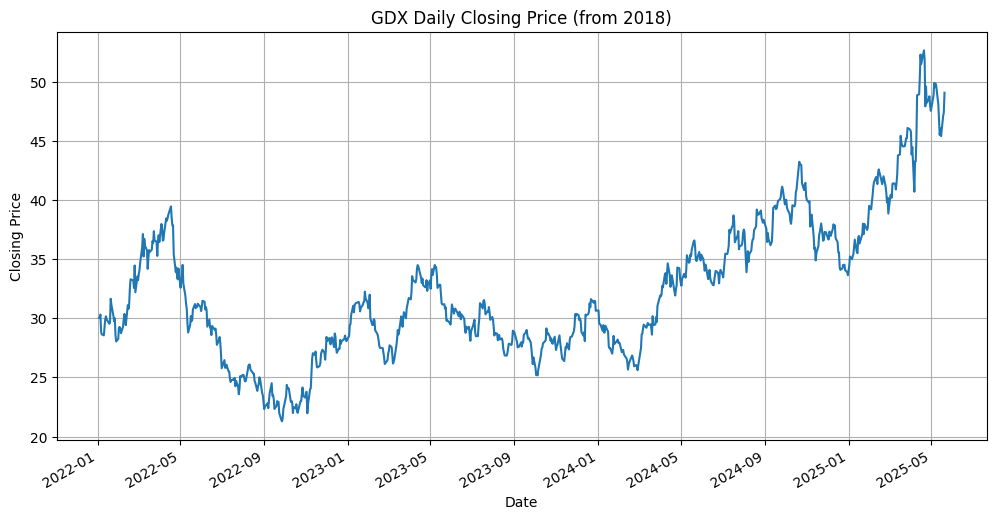

Number of technical indicators successfully added to GDX: 39


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_3041/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.78827080e+08 2.86501421e+08 2.42967233e+08 1.87112079e+08
 7.55411399e+08 3.91855822e+08 2.59367015e+08 2.09368697e+08
 1.85995926e+08 2.89862729e+08 1.83658704e+08 2.29481344e+08
 6.49720918e+08 2.75862335e+08 3.00594412e+08 4.73133252e+08
 3.88658167e+08 7.22251389e+08 2.55348235e+08 4.92886031e+08
 3.99979401e+08 2.52607155e+08 4.26131012e+08 5.51133525e+08
 9.47815087e+08 5.10363594e+08 3.61064231e+08 5.52773490e+08
 4.05966352e+08 3.63095036e+08 3.11544932e+08 2.13175164e+08
 2.00675526e+08 1.82287574e+08 2.40259076e+08 2.77453652e+08
 2.66110616e+08 3.14822745e+08 3.19229504e+08 2.54521002e+08
 2.45267478e+08 2.45353232e+08 2.93897442e+08 2.39133378e+08
 2.24842252e+08 3.10402650e+08 3.60884600e+08 2.10624381e+08
 2.11538396e+08 4.01870018e+08 2.07955042e+08 1.52765443e


Data for GDXJ:
                 open       high        low      close   volume  SMA_100  \
Date                                                                       
2022-01-03  39.501720  39.944589  39.424702  39.732783  6289900      NaN   
2022-01-04  39.819431  40.464474  39.597999  39.800176  4475800      NaN   
2022-01-05  38.818169  40.647399  38.702639  40.098631  8230100      NaN   
2022-01-06  37.325901  38.298279  37.325901  37.932436  9988900      NaN   
2022-01-07  37.778397  37.951689  37.191117  37.643608  5560100      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2022-01-03     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-04     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-06     NaN     NaN     NaN      NaN  ...       0        0 

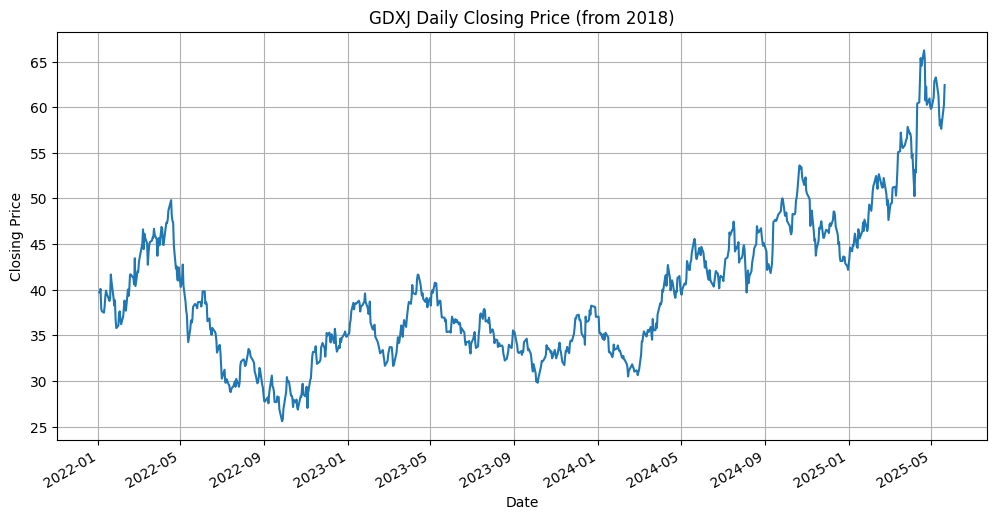

Number of technical indicators successfully added to GDXJ: 39

Data for XLE:
                 open       high        low      close    volume  SMA_100  \
Date                                                                        
2022-01-03  50.839958  50.919923  49.356162  49.382819  32527100      NaN   
2022-01-04  52.599194  52.803548  51.364179  51.532993  39978800      NaN   
2022-01-05  52.590302  53.700926  52.510336  53.114517  45402000      NaN   
2022-01-06  53.763123  54.065213  53.007899  53.825321  37340700      NaN   
2022-01-07  54.500576  54.642736  53.594306  53.967478  35584600      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2022-01-03     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-04     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-05     NaN     NaN     NaN      NaN  ...       0        0       1  

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_3041/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.07490932e+09 2.41123634e+09 2.00268670e+09 1.92399431e+09
 1.80560048e+09 2.11980788e+09 1.70391910e+09 1.83042691e+09
 2.36574421e+09 3.32611153e+09 3.81396228e+09 3.19675152e+09
 1.83963065e+09 2.66982768e+09 1.96586708e+09 1.86870820e+09
 2.50829881e+09 2.32331579e+09 2.30997218e+09 2.86322893e+09
 3.06838542e+09 2.24586489e+09 2.83926864e+09 3.72306768e+09
 2.95565148e+09 3.93667507e+09 2.93350146e+09 3.44804223e+09
 4.43428474e+09 6.78283608e+09 4.67813557e+09 3.12995836e+09
 3.43248629e+09 2.49810794e+09 1.92066585e+09 2.31806756e+09
 2.25300724e+09 2.02756080e+09 1.82416204e+09 1.94511694e+09
 1.72683921e+09 1.59372387e+09 1.87675337e+09 2.26339083e+09
 1.74853743e+09 1.85161088e+09 2.20395775e+09 2.98100787e+09
 2.96840751e+09 2.72977227e+09 2.88639168e+09 3.26894233e

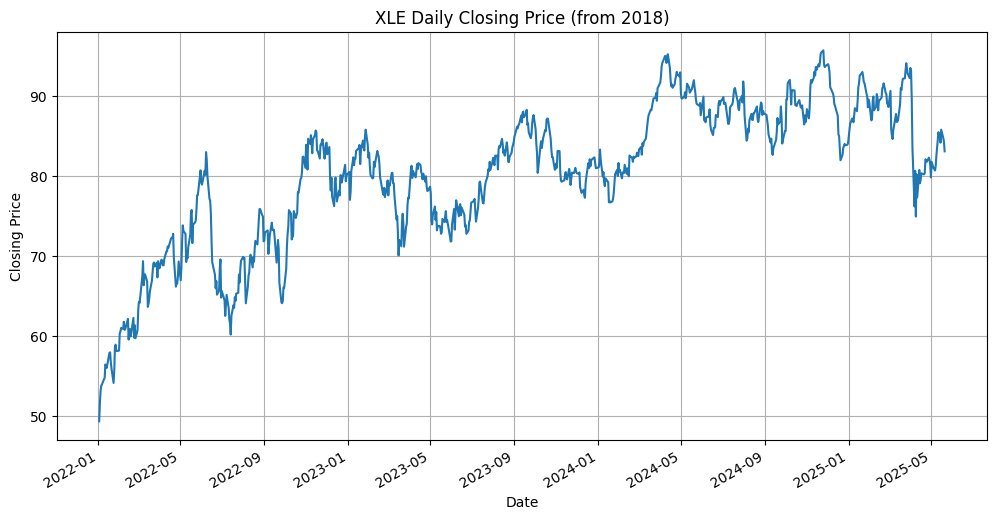

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_3041/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.07643876e+08 8.86007328e+07 9.46312215e+07 1.43690492e+08
 1.52970542e+08 1.62367477e+08 1.04346838e+08 1.02755688e+08
 1.05942157e+08 7.77542289e+07 1.20086187e+08 9.45718413e+07
 5.68401713e+07 1.07489676e+08 7.95233137e+07 1.21578014e+08
 2.64560937e+08 1.78166536e+08 2.30605632e+08 3.54664506e+08
 2.61858939e+08 1.27026071e+08 1.35843393e+08 1.00234698e+08
 1.17332850e+08 9.07980702e+07 9.87795818e+07 6.18501781e+07
 8.16288874e+07 8.68074877e+07 1.17503708e+08 9.26875992e+07
 1.54156021e+08 1.12097543e+08 1.24684945e+08 1.02127077e+08
 1.04227891e+08 1.22219432e+08 9.05168216e+07 9.67184536e+07
 8.80282810e+07 9.57753750e+07 6.58458926e+07 9.72497437e+07
 9.81819386e+07 1.74780058e+08 1.04390464e+08 6.32183426e+07
 6.03345509e+07 8.31778492e+07 8.39073320e+07 1.45976430e

Number of technical indicators successfully added to XLE: 39

Data for ICLN:
                 open       high        low      close   volume  SMA_100  \
Date                                                                       
2022-01-03  20.514784  20.630142  20.284065  20.543624  4360300      NaN   
2022-01-04  20.197546  20.534012  19.947600  20.534012  5200200      NaN   
2022-01-05  19.255442  20.034118  19.255442  20.034118  7501900      NaN   
2022-01-06  18.986271  19.226603  18.745938  19.120857  7642400      NaN   
2022-01-07  18.899750  19.178536  18.803616  18.928590  4522100      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2022-01-03     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-04     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-

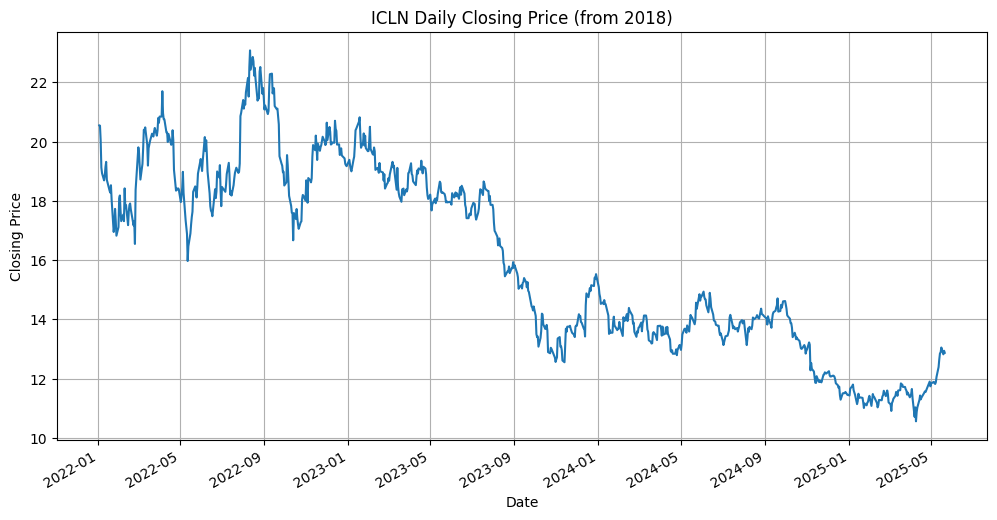

Number of technical indicators successfully added to ICLN: 39


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_3041/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.24813469e+10 3.30173655e+10 3.03981078e+10 6.94577963e+10
 7.78742083e+10 6.44682274e+10 5.29282877e+10 5.10136176e+10
 3.61721270e+10 4.02887056e+10 3.75188161e+10 3.60042005e+10
 5.01805845e+10 6.02502304e+10 4.88131978e+10 4.41376639e+10
 4.75336454e+10 3.88253178e+10 4.27368108e+10 5.94902112e+10
 4.27099770e+10 4.47883544e+10 3.75306422e+10 3.19688840e+10
 2.77007306e+10 3.32711033e+10 2.96916673e+10 3.80995751e+10
 2.59043113e+10 3.22692569e+10 3.33829286e+10 3.40050278e+10
 4.14022108e+10 3.28062915e+10 2.78421187e+10 4.27102013e+10
 3.98051421e+10 5.80070645e+10 3.97334632e+10 3.01393525e+10
 3.22561396e+10 4.90950478e+10 2.87906596e+10 3.45431207e+10
 3.15670711e+10 3.32916899e+10 3.79548792e+10 2.83413364e+10
 2.27867017e+10 2.54601821e+10 4.54403721e+10 2.75710593e


Data for SPY:
                  open        high         low       close     volume  \
Date                                                                    
2022-01-03  455.810455  455.944051  452.127422  454.465090   72668200   
2022-01-04  455.657745  457.976369  453.778055  457.251201   71178700   
2022-01-05  446.908112  456.068026  446.812690  455.285610  104538900   
2022-01-06  446.488342  449.236320  444.093398  446.440646   86858900   
2022-01-07  444.723083  447.690527  443.349095  446.497831   85111600   

            SMA_100  EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  \
Date                                                  ...                    
2022-01-03      NaN     NaN     NaN     NaN      NaN  ...       0        0   
2022-01-04      NaN     NaN     NaN     NaN      NaN  ...       0        0   
2022-01-05      NaN     NaN     NaN     NaN      NaN  ...       0        0   
2022-01-06      NaN     NaN     NaN     NaN      NaN  ...       0        0   
2022-

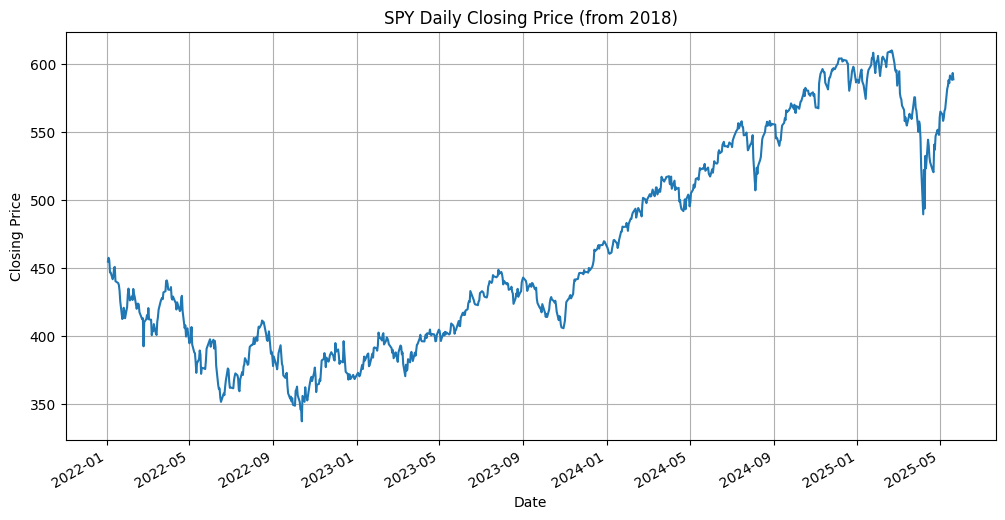

Number of technical indicators successfully added to SPY: 39


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_3041/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.17799903e+09 1.48295929e+09 1.37143326e+09 1.17803957e+09
 1.41469575e+09 1.06970788e+09 1.33788470e+09 2.69799196e+09
 1.64772108e+09 2.99481989e+09 1.43286607e+09 1.64453370e+09
 1.53123645e+09 1.61971620e+09 1.32271810e+09 9.87945224e+08
 1.36754512e+09 1.82848162e+09 4.42462066e+09 2.37731487e+09
 2.22162166e+09 3.29205489e+09 2.25792080e+09 2.65578802e+09
 2.09207690e+09 5.89569806e+09 2.85980561e+09 3.94840773e+09
 2.73343370e+09 4.08582006e+09 5.17397133e+09 8.99464263e+09
 3.44035696e+09 1.98575923e+09 1.90458436e+09 2.26843433e+09
 2.00251864e+09 1.50603732e+09 1.78324746e+09 1.27284126e+09
 1.95393064e+09 1.82716712e+09 1.92818449e+09 1.83838153e+09
 2.21108345e+09 1.59642209e+09 1.64830512e+09 1.60704546e+09
 1.37256268e+09 1.25757276e+09 1.83373937e+09 2.25958367e


Data for GLD:
                  open        high         low       close    volume  SMA_100  \
Date                                                                            
2022-01-03  168.330002  169.009995  168.000000  168.860001   9014400      NaN   
2022-01-04  169.570007  169.720001  168.729996  168.899994   6965600      NaN   
2022-01-05  169.059998  170.929993  168.899994  170.619995   8715600      NaN   
2022-01-06  166.990005  167.750000  166.860001  167.160004  10902700      NaN   
2022-01-07  167.750000  168.009995  166.860001  167.369995   8191900      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2022-01-03     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-04     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-06     NaN     NaN     N

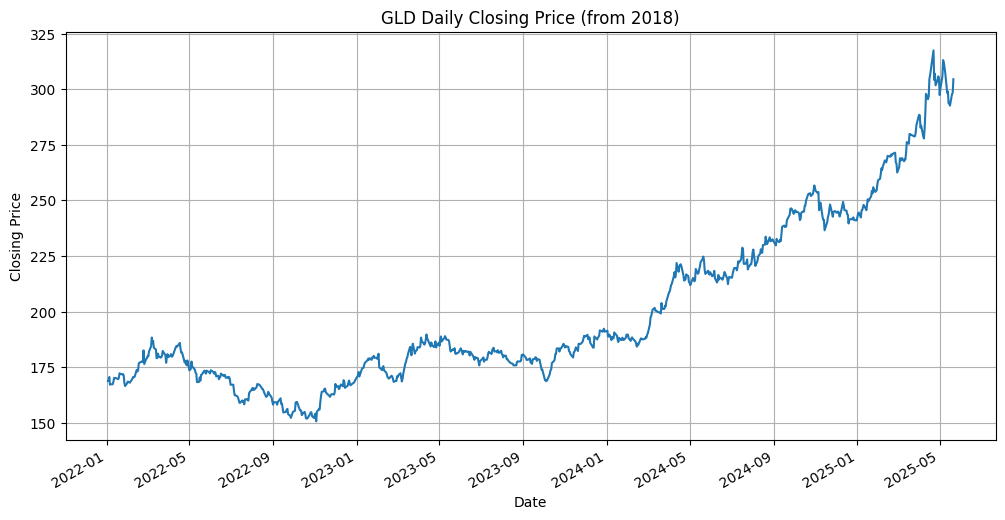

Number of technical indicators successfully added to GLD: 39


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_3041/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 2668280.01251221  3723838.63830566  1731824.9835968   8048325.91171265
  4502801.35854085  5965862.01095581  4303362.95655569  1697498.0255127
  2974973.37214152  1702648.34938049  1905939.98222351  2335325.
  5091936.02790833  4378269.41579183  2994961.64735158  1378404.31556702
  2217968.99185181  2466394.01607513  4278715.95306396  4324972.96504974
  8069073.34041595 11399357.41119385  7644985.03437042 24819268.64407858
 29708116.93191528  6029870.0267156   2404501.33120219  3712146.63403829
  2754947.06516266  1896188.67340088  2604122.66896566  3290477.98843384
  3452841.33936564  3625845.27638753 27271385.78281403 11528504.06188965
  2220671.36103312  2837538.64644368  9647230.85174561  3282692.9649353
  3100659.99126434  5413894.0158844   4025268.69812012  3943209.96170


Data for CPER:
                 open       high        low      close  volume  SMA_100  \
Date                                                                      
2022-01-03  26.959999  27.040001  26.459999  26.660000  130200      NaN   
2022-01-04  27.260000  27.330000  27.010000  27.010000   98400      NaN   
2022-01-05  26.700001  27.180000  26.680000  27.020000  159300      NaN   
2022-01-06  26.590000  26.620001  26.360001  26.420000  130900      NaN   
2022-01-07  26.889999  26.940001  26.570000  26.629999  139400      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2022-01-03     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-04     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-06     NaN     NaN     NaN      NaN  ...       0        0       1

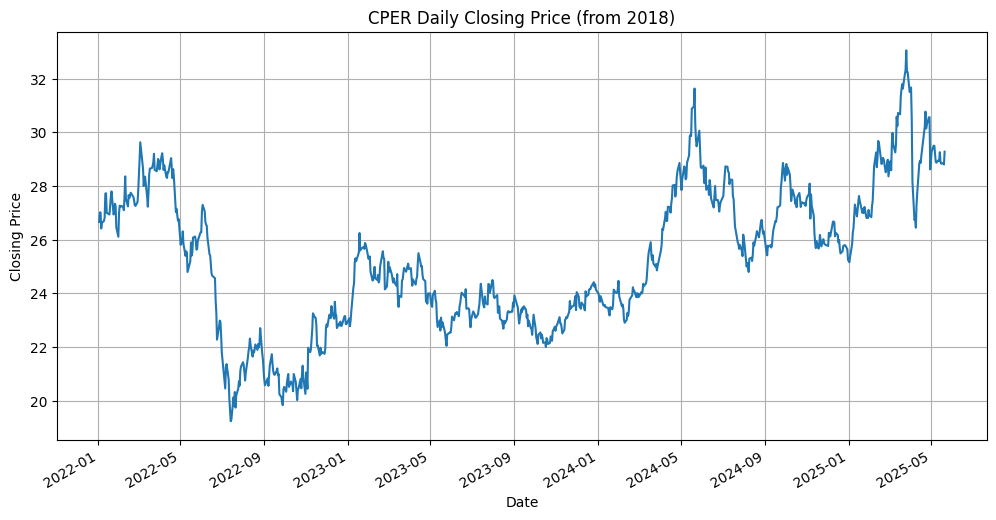

Number of technical indicators successfully added to CPER: 39


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_3041/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.69741591e+08 2.82553681e+08 2.82499890e+08 3.91721486e+08
 3.03228143e+08 2.75162752e+08 3.58152755e+08 3.77797231e+08
 3.33625149e+08 3.68241534e+08 4.16678183e+08 3.57843147e+08
 2.61065684e+08 2.67473625e+08 2.08165304e+08 3.26927130e+08
 3.13460758e+08 2.51324096e+08 3.07316050e+08 8.00672427e+08
 6.25392890e+08 4.52310156e+08 6.17634581e+08 1.25058395e+09
 5.99720261e+08 1.19344764e+09 1.62548326e+09 1.38408426e+09
 1.34792808e+09 1.34179293e+09 2.53843572e+09 5.16133683e+08
 7.06257387e+08 3.29810845e+08 5.00747608e+08 3.28303849e+08
 5.02543403e+08 4.08772045e+08 4.69971439e+08 5.77250475e+08
 4.14924262e+08 5.15812112e+08 5.34139076e+08 5.82605463e+08
 4.30544161e+08 3.76716147e+08 5.55577759e+08 5.26472246e+08
 4.78522551e+08 2.30074552e+08 4.31403838e+08 4.87433089e


Data for USO:
                 open       high        low      close   volume  SMA_100  \
Date                                                                       
2022-01-03  54.830002  55.160000  53.939999  53.970001  5602900      NaN   
2022-01-04  55.590000  56.049999  55.250000  55.310001  4857000      NaN   
2022-01-05  55.430000  56.480000  55.430000  56.160000  5043500      NaN   
2022-01-06  56.889999  57.310001  56.650002  57.099998  4954400      NaN   
2022-01-07  56.669998  57.040001  56.369999  56.900002  6023600      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2022-01-03     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-04     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-06     NaN     NaN     NaN      NaN  ...       0        0  

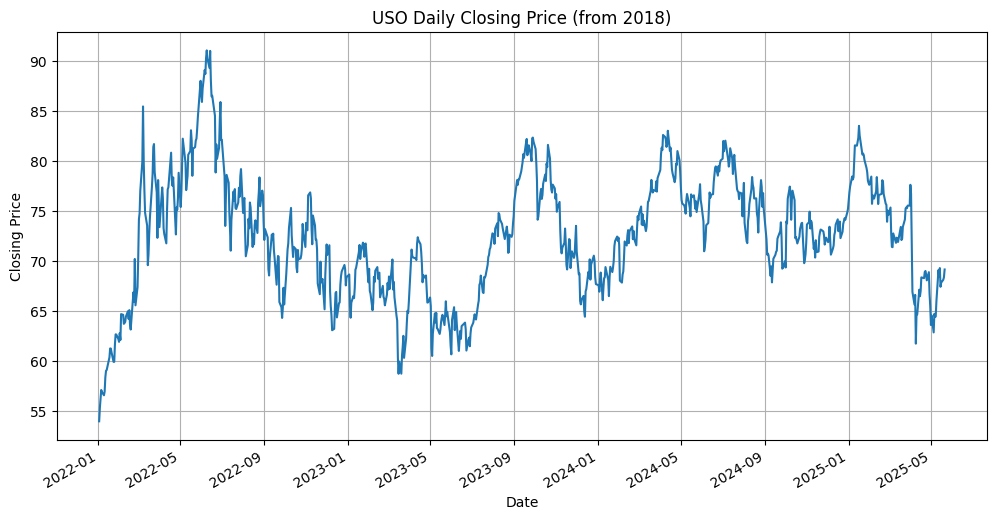

Number of technical indicators successfully added to USO: 39


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_3041/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[9.49748439e+07 7.73273308e+07 7.49701168e+07 9.06660480e+07
 1.48884612e+08 9.89566468e+07 2.92111258e+08 1.07247823e+08
 1.24762076e+08 8.56643958e+07 6.42491433e+07 1.40615029e+08
 2.13139470e+08 3.34487479e+08 1.94538183e+08 4.07017068e+08
 1.03762631e+08 1.12802758e+08 1.21602187e+08 1.75349704e+08
 8.98974365e+07 1.62548771e+08 1.31164985e+08 1.40711585e+08
 2.20582222e+08 1.15825386e+08 1.62354133e+08 1.67098534e+08
 1.44599276e+08 6.34308031e+07 6.75038097e+07 7.55821045e+07
 9.71385931e+07 7.44762831e+07 9.46593272e+07 9.44395425e+07
 1.49343816e+08 1.53128648e+08 1.27960838e+08 1.99186068e+08
 1.19161444e+08 2.35807900e+08 3.42074222e+08 1.89856208e+08
 2.00982426e+08 3.12237127e+08 3.02046128e+08 3.32977076e+08
 5.45322515e+08 3.11546400e+08 2.88373113e+08 1.62162647e


Data for UNG:
                 open       high        low      close   volume  SMA_100  \
Date                                                                       
2022-01-03  51.080002  51.240002  48.360001  49.799999  1654075      NaN   
2022-01-04  49.759998  51.119999  49.279999  50.880001  1883425      NaN   
2022-01-05  51.200001  51.720001  50.000000  50.959999  1519400      NaN   
2022-01-06  51.200001  51.520000  50.560001  51.160000  1467700      NaN   
2022-01-07  52.080002  52.840000  51.400002  51.720001  1744025      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2022-01-03     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-04     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2022-01-06     NaN     NaN     NaN      NaN  ...       0        0  

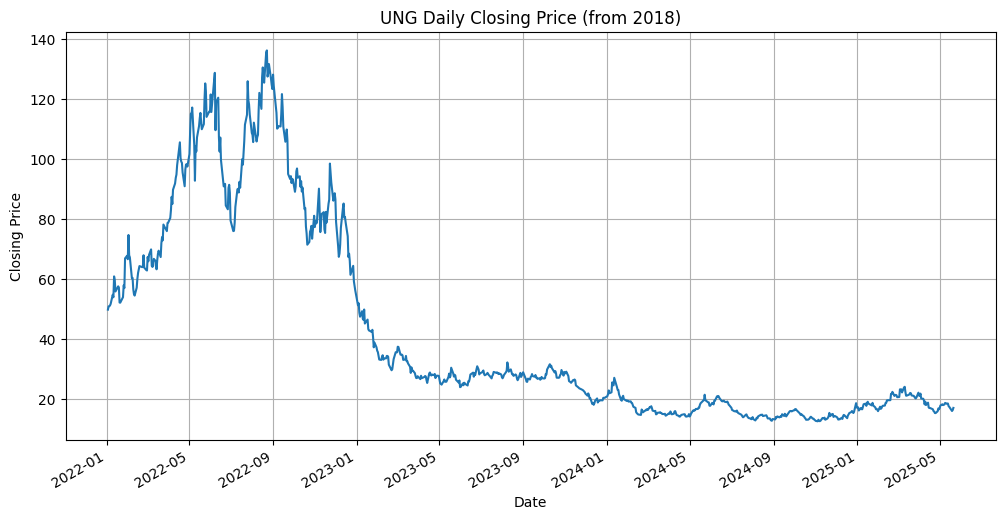

Number of technical indicators successfully added to UNG: 39

Data for JJN:
                 open       high    low      close  volume  SMA_100  EMA_20  \
Date                                                                          
2022-01-03  27.310400  27.530001  27.07  27.530001   11781      NaN     NaN   
2022-01-04  27.607100  27.790001  27.49  27.490000    8147      NaN     NaN   
2022-01-05  27.100000  27.420000  26.83  27.150000   34843      NaN     NaN   
2022-01-06  26.969999  27.190001  26.48  26.480000   62830      NaN     NaN   
2022-01-07  27.280100  27.490000  27.00  27.150000   23152      NaN     NaN   

            WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                 ...                            
2022-01-03     NaN     NaN      NaN  ...       0        0       1   
2022-01-04     NaN     NaN      NaN  ...       0        0       1   
2022-01-05     NaN     NaN      NaN  ...       0        0       1   
2022-01-06     NaN     Na

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_3041/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.24775731e+05 6.30043089e+05 8.00299496e+05 1.06524032e+06
 4.11710900e+05 2.26959921e+06 2.61520806e+05 6.53631611e+05
 1.75372924e+06 1.83321804e+06 7.42189271e+05 6.06846095e+05
 3.37266643e+05 1.30167133e+05 1.56802499e+06 6.78040729e+05
 3.98511779e+05 3.05590504e+05 3.26924487e+05 1.33293906e+06
 8.15351990e+05 2.28995313e+06 1.45304764e+06 1.87196015e+06
 1.41134325e+06 3.34231006e+06 3.17088125e+06 5.21555334e+06
 5.02271152e+07 3.02696835e+07 3.87199100e+06 5.43428181e+06
 7.26672703e+06 1.41485092e+07 2.98820391e+06 2.06578823e+06
 2.51101486e+06 1.41575712e+06 2.19939898e+06 1.82635576e+06
 9.23414920e+05 1.01174862e+06 2.18456168e+06 1.33675645e+06
 1.19262928e+06 7.37223090e+05 5.43841270e+05 7.22283309e+05
 3.23428375e+05 7.98858310e+05 8.07001373e+05 7.82287277e

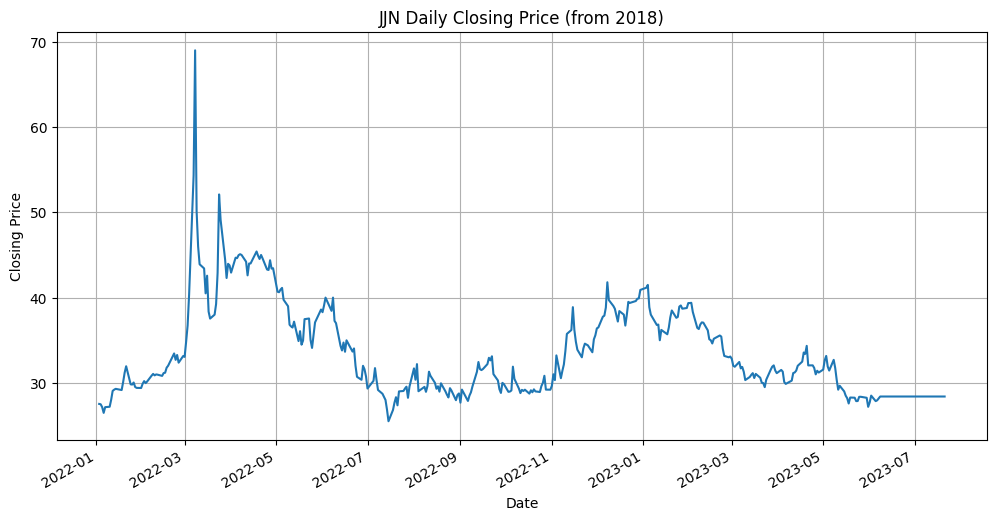

Number of technical indicators successfully added to JJN: 39


In [10]:
# Apply technical indicators to each dataframe
for symbol, data in all_data.items():
    # Skip completely if DataFrame is empty or too small
    if len(data) <= 1:
        print(f"Warning: Ticker {symbol} has insufficient data (length={len(data)}). Skipping technical indicators.")
        continue

    # Rename columns if needed (ensure they match pandas_ta requirements)
    if data.columns[0] != 'open':  # Only rename if not already renamed
        data.columns = ['open', 'high', 'low', 'close', 'volume']

    indicator_count = 0  # Track the number of successfully added indicators

    # Trend Indicators
    try:
        data.ta.sma(length=100, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding SMA to {symbol}: {e}")

    try:
        data.ta.ema(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding EMA to {symbol}: {e}")

    try:
        data.ta.wma(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding WMA to {symbol}: {e}")

    try:
        data.ta.hma(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding HMA to {symbol}: {e}")

    try:
        data.ta.vwma(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding VWMA to {symbol}: {e}")

    try:
        data.ta.macd(fast=12, slow=26, signal=9, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding MACD to {symbol}: {e}")

    try:
        data.ta.adx(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding ADX to {symbol}: {e}")

    try:
        data.ta.cci(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding CCI to {symbol}: {e}")

    try:
        data.ta.rsi(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding RSI to {symbol}: {e}")

    try:
        data.ta.stoch(k=14, d=3, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Stochastic Oscillator to {symbol}: {e}")

    try:
        data.ta.ichimoku(tenkan=9, kijun=26, senkou=52, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Ichimoku Cloud to {symbol}: {e}")

    try:
        data.ta.supertrend(length=7, multiplier=3, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding SuperTrend to {symbol}: {e}")

    # Check for PSAR which needs more data
    try:
        if len(data) > 2:
            data.ta.psar(step=0.02, max_step=0.2, append=True)
            indicator_count += 1
        else:
            data['PSARl_0.02_0.2'] = float('nan')
            data['PSARs_0.02_0.2'] = float('nan')
    except Exception as e:
        print(f"Error adding PSAR to {symbol}: {e}")

    # Momentum Indicators
    try:
        data.ta.mom(length=50, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Momentum to {symbol}: {e}")

    try:
        data.ta.roc(length=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding ROC to {symbol}: {e}")

    try:
        data.ta.willr(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Williams %R to {symbol}: {e}")

    try:
        data.ta.uo(append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Ultimate Oscillator to {symbol}: {e}")

    try:
        data.ta.ao(fast=5, slow=34, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Awesome Oscillator to {symbol}: {e}")

    try:
        data.ta.kama(length=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding KAMA to {symbol}: {e}")

    try:
        data.ta.cg(length=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Center of Gravity to {symbol}: {e}")

    # Volatility Indicators
    try:
        data.ta.bbands(length=20, std=2, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Bollinger Bands to {symbol}: {e}")

    try:
        data.ta.atr(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding ATR to {symbol}: {e}")

    try:
        data.ta.kc(length=20, scalar=2, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Keltner Channel to {symbol}: {e}")

    try:
        data.ta.donchian(lower_length=20, upper_length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Donchian Channel to {symbol}: {e}")

    try:
        data.ta.rvi(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding RVI to {symbol}: {e}")

    # Volume Indicators - OBV needs a length check
    try:
        if len(data) > 1:
            data.ta.obv(append=True)
            indicator_count += 1
        else:
            data['OBV'] = float('nan')
    except Exception as e:
        print(f"Error adding OBV to {symbol}: {e}")

    try:
        data.ta.cmf(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding CMF to {symbol}: {e}")

    try:
        data.ta.adosc(fast=3, slow=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding AD Oscillator to {symbol}: {e}")

    try:
        data.ta.mfi(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding MFI to {symbol}: {e}")

    try:
        data.ta.vwap(append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding VWAP to {symbol}: {e}")

    try:
        data.ta.eom(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Ease of Movement to {symbol}: {e}")

    try:
        data.ta.nvi(length=255, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding NVI to {symbol}: {e}")

    # Other Indicators
    try:
        data.ta.squeeze(append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding TTM Squeeze to {symbol}: {e}")

    try:
        data.ta.fisher(length=9, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Fisher Transform to {symbol}: {e}")

    try:
        data.ta.decay(length=5, mode="linear", append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Linear Decay to {symbol}: {e}")

    try:
        data.ta.decay(length=5, mode="exponential", append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Exponential Decay to {symbol}: {e}")

    try:
        data.ta.vortex(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Vortex Indicator to {symbol}: {e}")

    try:
        data.ta.zscore(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Z-Score to {symbol}: {e}")

    try:
        data.ta.entropy(length=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Entropy to {symbol}: {e}")

    print(f"\nData for {symbol}:")
    print(data.head())  # Print the first few rows of the dataset

    # Plot the data
    data['close'].plot(figsize=(12, 6), title=f'{symbol} Daily Closing Price (from 2018)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.show()

    # Print the number of technical indicators added
    print(f"Number of technical indicators successfully added to {symbol}: {indicator_count}")

In [11]:
for symbol, data in all_data.items():
    # Get the original column names
    original_columns = data.columns.tolist()
    # Create the new column names with the symbol prefix
    new_columns = [f"{symbol}_{col}" for col in original_columns]
    # Rename the columns in the DataFrame
    data.columns = new_columns
    print(f"\nColumns for {symbol} after renaming:")
    print(data.columns)


Columns for LIT after renaming:
Index(['LIT_open', 'LIT_high', 'LIT_low', 'LIT_close', 'LIT_volume',
       'LIT_SMA_100', 'LIT_EMA_20', 'LIT_WMA_20', 'LIT_HMA_20', 'LIT_VWMA_20',
       'LIT_MACD_12_26_9', 'LIT_MACDh_12_26_9', 'LIT_MACDs_12_26_9',
       'LIT_ADX_14', 'LIT_DMP_14', 'LIT_DMN_14', 'LIT_CCI_20_0.015',
       'LIT_RSI_14', 'LIT_STOCHk_14_3_3', 'LIT_STOCHd_14_3_3', 'LIT_ISA_9',
       'LIT_ISB_26', 'LIT_ITS_9', 'LIT_IKS_26', 'LIT_ICS_26',
       'LIT_SUPERT_7_3.0', 'LIT_SUPERTd_7_3.0', 'LIT_SUPERTl_7_3.0',
       'LIT_SUPERTs_7_3.0', 'LIT_PSARl_0.02_0.2', 'LIT_PSARs_0.02_0.2',
       'LIT_PSARaf_0.02_0.2', 'LIT_PSARr_0.02_0.2', 'LIT_MOM_50', 'LIT_ROC_10',
       'LIT_WILLR_14', 'LIT_UO_7_14_28', 'LIT_AO_5_34', 'LIT_KAMA_10_2_30',
       'LIT_CG_10', 'LIT_BBL_20_2.0', 'LIT_BBM_20_2.0', 'LIT_BBU_20_2.0',
       'LIT_BBB_20_2.0', 'LIT_BBP_20_2.0', 'LIT_ATRr_14', 'LIT_KCLe_20_2.0',
       'LIT_KCBe_20_2.0', 'LIT_KCUe_20_2.0', 'LIT_DCL_20_20', 'LIT_DCM_20_20',
       'LIT_DCU_

In [12]:

dataframes_to_join = []

for symbol, data in all_data.items():
    dataframes_to_join.append(data)

merged_data = pd.concat(dataframes_to_join, axis=1)

print("\nMerged DataFrame head:")
print(merged_data.head())

print("\nMerged DataFrame info:")
merged_data.info()


Merged DataFrame head:
             LIT_open   LIT_high    LIT_low  LIT_close  LIT_volume  \
Date                                                                 
2022-01-03  83.434250  83.560471  82.579811  82.968188      907100   
2022-01-04  83.007042  83.181814  81.871025  83.084720     1311600   
2022-01-05  79.094086  81.696248  79.006703  81.463221     1206100   
2022-01-06  78.725121  79.424210  77.579392  79.045538      985200   
2022-01-07  78.666855  79.433911  77.773577  78.802796      810900   

            LIT_SMA_100  LIT_EMA_20  LIT_WMA_20  LIT_HMA_20  LIT_VWMA_20  ...  \
Date                                                                      ...   
2022-01-03          NaN         NaN         NaN         NaN          NaN  ...   
2022-01-04          NaN         NaN         NaN         NaN          NaN  ...   
2022-01-05          NaN         NaN         NaN         NaN          NaN  ...   
2022-01-06          NaN         NaN         NaN         NaN          NaN  ...   

In [13]:
merged_data


,LIT_open,LIT_high,LIT_low,LIT_close,LIT_volume,LIT_SMA_100,LIT_EMA_20,LIT_WMA_20,LIT_HMA_20,LIT_VWMA_20,...,JJN_SQZ_ON,JJN_SQZ_OFF,JJN_SQZ_NO,JJN_FISHERT_9_1,JJN_FISHERTs_9_1,JJN_LDECAY_5,JJN_VTXP_14,JJN_VTXM_14,JJN_ZS_20,JJN_ENTP_10
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,83.434250,83.560471,82.579811,82.968188,907100,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,NaN,NaN,27.530001,NaN,NaN,NaN,NaN
2022-01-04,83.007042,83.181814,81.871025,83.084720,1311600,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,NaN,NaN,27.490000,NaN,NaN,NaN,NaN
2022-01-05,79.094086,81.696248,79.006703,81.463221,1206100,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,NaN,NaN,27.290000,NaN,NaN,NaN,NaN
2022-01-06,78.725121,79.424210,77.579392,79.045538,985200,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,NaN,NaN,26.950000,NaN,NaN,NaN,NaN
2022-01-07,78.666855,79.433911,77.773577,78.802796,810900,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,NaN,NaN,27.150000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-15,38.740002,38.970001,38.470001,38.820000,128900,39.510296,37.448244,37.555428,38.613898,36.994942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-16,38.580002,38.599998,38.299999,38.480000,143500,39.475799,37.546506,37.702047,38.847856,37.147546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-19,38.200001,38.259998,37.889999,37.889999,220500,39.439290,37.579220,37.776428,38.924853,37.312762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data

,JJN_open,JJN_high,JJN_low,JJN_close,JJN_volume,JJN_SMA_100,JJN_EMA_20,JJN_WMA_20,JJN_HMA_20,JJN_VWMA_20,...,JJN_SQZ_ON,JJN_SQZ_OFF,JJN_SQZ_NO,JJN_FISHERT_9_1,JJN_FISHERTs_9_1,JJN_LDECAY_5,JJN_VTXP_14,JJN_VTXM_14,JJN_ZS_20,JJN_ENTP_10
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,27.310400,27.530001,27.07,27.530001,11781,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,27.530001,NaN,NaN,NaN,NaN
2022-01-04,27.607100,27.790001,27.49,27.490000,8147,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,27.490000,NaN,NaN,NaN,NaN
2022-01-05,27.100000,27.420000,26.83,27.150000,34843,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,27.290000,NaN,NaN,NaN,NaN
2022-01-06,26.969999,27.190001,26.48,26.480000,62830,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,26.950000,NaN,NaN,NaN,NaN
2022-01-07,27.280100,27.490000,27.00,27.150000,23152,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,27.150000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-17,28.400000,28.400000,28.40,28.400000,0,30.188241,28.419565,28.4,28.4,NaN,...,0,0,1,-7.513169,-7.425936,28.400000,0.0,0.0,NaN,3.321928
2023-07-18,28.400000,28.400000,28.40,28.400000,0,30.117941,28.417701,28.4,28.4,NaN,...,0,0,1,-7.556786,-7.513169,28.400000,0.0,0.0,NaN,3.321928
2023-07-19,28.400000,28.400000,28.40,28.400000,0,30.061941,28.416015,28.4,28.4,NaN,...,0,0,1,-7.578594,-7.556786,28.400000,0.0,0.0,NaN,3.321928


In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import iqr

def fill_nan_with_rolling_median(data, window_size=21):
    """
    Fill NaN values in a DataFrame using forward fill first, then rolling median.
    Any remaining NaNs (e.g., at the start) are set to zero.
    """
    # Forward fill first
    data_ffill = data.ffill()
    # Fill remaining NaNs with rolling median
    data_filled = data_ffill.apply(lambda x: x.fillna(x.rolling(window=window_size, min_periods=1).median()), axis=0)
    # Fill any remaining NaNs (e.g., at the very start) with zero
    data_filled = data_filled.fillna(0)
    return data_filled

# Usage example with your existing pipeline
# First handle missing values
merged_data_filled = fill_nan_with_rolling_median(merged_data.copy(), window_size=21)

In [16]:
merged_data_filled.describe()

,LIT_open,LIT_high,LIT_low,LIT_close,LIT_volume,LIT_SMA_100,LIT_EMA_20,LIT_WMA_20,LIT_HMA_20,LIT_VWMA_20,...,JJN_SQZ_ON,JJN_SQZ_OFF,JJN_SQZ_NO,JJN_FISHERT_9_1,JJN_FISHERTs_9_1,JJN_LDECAY_5,JJN_VTXP_14,JJN_VTXM_14,JJN_ZS_20,JJN_ENTP_10
count,849.000000,849.000000,849.000000,849.000000,8.490000e+02,849.000000,849.000000,849.000000,849.000000,849.000000,...,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,54.893843,55.406862,54.368292,54.866437,4.747082e+05,48.294260,53.566018,53.391085,52.854759,53.476189,...,0.080094,0.342756,0.577150,-4.289056,-4.277156,30.898705,0.334719,0.339575,0.107418,3.250350
std,13.047987,13.199890,12.876283,13.084494,2.526742e+05,20.701624,14.907241,14.899360,15.227993,14.891705,...,0.271599,0.474911,0.494303,3.823915,3.822493,4.790772,0.399345,0.409820,0.813498,0.480948
min,31.820000,34.000000,31.440001,32.480000,4.936200e+04,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-7.594950,-7.589498,26.670001,0.000000,0.000000,-3.099475,0.000000
25%,42.727242,43.080002,42.382004,42.699027,2.940000e+05,41.235876,42.620156,42.597260,42.010168,42.753717,...,0.000000,0.000000,0.000000,-7.594950,-7.589498,28.400000,0.000000,0.000000,0.144654,3.321928
50%,56.266449,56.817302,56.030362,56.276282,4.239000e+05,48.765920,53.754647,53.071409,51.621943,53.533739,...,0.000000,0.000000,1.000000,-7.594950,-7.589498,28.400000,0.000000,0.000000,0.223607,3.321928
75%,66.264046,66.831167,65.444165,66.228916,5.979000e+05,63.836456,66.103102,65.689416,65.007564,65.628026,...,0.000000,1.000000,1.000000,-0.409588,-0.369527,31.517900,0.756198,0.763602,0.223607,3.321928
max,83.434250,83.560471,82.579811,83.084720,2.277000e+06,71.897646,78.533842,77.159015,79.010937,78.433019,...,1.000000,1.000000,1.000000,3.828082,3.828082,69.000000,1.436667,1.130398,3.818032,3.625588


In [17]:
pd.set_option('display.max_rows', None)
merged_data_filled.isna().sum().transpose()

LIT_open                  0
LIT_high                  0
LIT_low                   0
LIT_close                 0
LIT_volume                0
LIT_SMA_100               0
LIT_EMA_20                0
LIT_WMA_20                0
LIT_HMA_20                0
LIT_VWMA_20               0
LIT_MACD_12_26_9          0
LIT_MACDh_12_26_9         0
LIT_MACDs_12_26_9         0
LIT_ADX_14                0
LIT_DMP_14                0
LIT_DMN_14                0
LIT_CCI_20_0.015          0
LIT_RSI_14                0
LIT_STOCHk_14_3_3         0
LIT_STOCHd_14_3_3         0
LIT_ISA_9                 0
LIT_ISB_26                0
LIT_ITS_9                 0
LIT_IKS_26                0
LIT_ICS_26                0
LIT_SUPERT_7_3.0          0
LIT_SUPERTd_7_3.0         0
LIT_SUPERTl_7_3.0         0
LIT_SUPERTs_7_3.0         0
LIT_PSARl_0.02_0.2        0
LIT_PSARs_0.02_0.2        0
LIT_PSARaf_0.02_0.2       0
LIT_PSARr_0.02_0.2        0
LIT_MOM_50                0
LIT_ROC_10                0
LIT_WILLR_14        

In [18]:
pd.reset_option('display.max_rows')

In [19]:
print(merged_data_filled.shape)

(849, 923)


In [20]:


# Print statistics to prove no NaNs remain
print('NaN count per column after filling:')
print(merged_data_filled.isna().sum())
print('Any NaNs left in data:', merged_data_filled.isna().any().any())
print('Any zeros in data:', (merged_data_filled == 0).any().any())

class FeatureScaler(BaseEstimator, TransformerMixin):
    """
    Automatically detects and applies optimal scaling for financial time series features.
    Handles mixed-scale features like RSI (0-100) and ATR (volatility) without hardcoding.
    """
    
    def __init__(self):
        self.scalers = {}
        self.feature_stats = {}

    def _auto_detect_scaler(self, data):
        """Heuristic-based scaler selection using financial data characteristics"""
        # Calculate distribution properties
        q1, q3 = np.percentile(data, [25, 75])
        iqr_val = q3 - q1
        range_val = np.max(data) - np.min(data)
        has_outliers = (iqr_val > 0) and (range_val / iqr_val > 4)
        
        # Check for common financial indicator ranges
        is_bounded = (
            (np.min(data) >= 0) and 
            (np.max(data) <= 100) and 
            (range_val >= 50)  # Typical for RSI-like features
        )
        
        if is_bounded:
            return MinMaxScaler(feature_range=(0, 1)), 'minmax'
        elif has_outliers:
            return RobustScaler(), 'robust'
        else:
            return StandardScaler(), 'standard'

    def fit(self, X, y=None):
        for col in X.columns:
            column_data = X[col].values.reshape(-1, 1)
            scaler, scaler_type = self._auto_detect_scaler(column_data)
            self.scalers[col] = scaler.fit(column_data)
            
            # Store metadata for MLOps monitoring
            self.feature_stats[col] = {
                'min': np.min(column_data),
                'max': np.max(column_data),
                'iqr': iqr(column_data),
                'scaler': scaler_type
            }
        return self

    def transform(self, X):
        X_scaled = X.copy()
        for col, scaler in self.scalers.items():
            X_scaled[col] = scaler.transform(X_scaled[col].values.reshape(-1, 1)).flatten()
        return X_scaled

    def get_feature_stats(self):
        """For MLOps monitoring and model interpretation"""
        return pd.DataFrame(self.feature_stats).T



NaN count per column after filling:
LIT_open        0
LIT_high        0
LIT_low         0
LIT_close       0
LIT_volume      0
               ..
JJN_LDECAY_5    0
JJN_VTXP_14     0
JJN_VTXM_14     0
JJN_ZS_20       0
JJN_ENTP_10     0
Length: 923, dtype: int64
Any NaNs left in data: False
Any zeros in data: True


In [21]:
# Define the target column
target_column = 'LIT_close'  # Replace with your actual target column name

# Instantiate the FeatureScaler
feature_scaler = FeatureScaler()

# Fit the scaler to the data excluding the target column
feature_scaler.fit(merged_data_filled.drop(columns=[target_column]))

# Transform the data excluding the target column
scaled_features = feature_scaler.transform(merged_data_filled.drop(columns=[target_column]))

# Combine the scaled features with the unscaled target column
scaled_data_df = pd.DataFrame(scaled_features, columns=merged_data_filled.columns.drop(target_column), index=merged_data_filled.index)
scaled_data_df[target_column] = merged_data_filled[target_column]


In [22]:
scaled_data_df

,LIT_open,LIT_high,LIT_low,LIT_volume,LIT_SMA_100,LIT_EMA_20,LIT_WMA_20,LIT_HMA_20,LIT_VWMA_20,LIT_MACD_12_26_9,...,JJN_SQZ_OFF,JJN_SQZ_NO,JJN_FISHERT_9_1,JJN_FISHERTs_9_1,JJN_LDECAY_5,JJN_VTXP_14,JJN_VTXM_14,JJN_ZS_20,JJN_ENTP_10,LIT_close
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,1.000000,2.134124,1.000000,1.589997,0.000000,0.000000,0.000000,0.000000,0.000000,0.355183,...,-0.722153,0.855952,1.122301,1.119604,-0.279034,-0.838664,-0.829083,-2.832154,-6.762196,82.968188
2022-01-04,0.991723,2.105421,0.986140,2.921027,0.000000,0.000000,0.000000,0.000000,0.000000,0.355183,...,-0.722153,0.855952,1.122301,1.119604,-0.291863,-0.838664,-0.829083,-2.832154,-6.762196,83.084720
2022-01-05,0.915912,1.992811,0.930131,2.573873,0.000000,0.000000,0.000000,0.000000,0.000000,0.355183,...,-0.722153,0.855952,1.122301,1.119604,-0.356009,-0.838664,-0.829083,-2.832154,-6.762196,81.463221
2022-01-06,0.908763,1.820584,0.902221,1.846989,0.000000,0.000000,0.000000,0.000000,0.000000,0.355183,...,-0.722153,0.855952,1.122301,1.119604,-0.465056,-0.838664,-0.829083,-2.832154,-6.762196,79.045538
2022-01-07,0.907634,1.821319,0.906018,1.273445,0.000000,0.000000,0.000000,0.000000,0.000000,0.355183,...,-0.722153,0.855952,1.122301,1.119604,-0.400911,-0.838664,-0.829083,-2.832154,-6.762196,78.802796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-15,0.134072,-1.245961,0.137466,-0.970714,0.549535,0.476842,0.486728,0.488716,0.471676,0.794972,...,-0.722153,0.855952,-0.865041,-0.867050,0.000000,-0.838664,-0.829083,0.000000,0.148914,38.820000
2025-05-16,0.130972,-1.274008,0.134142,-0.922672,0.549056,0.478093,0.488628,0.491677,0.473621,0.814727,...,-0.722153,0.855952,-0.865041,-0.867050,0.000000,-0.838664,-0.829083,0.000000,0.148914,38.480000
2025-05-19,0.123609,-1.299781,0.126125,-0.669299,0.548548,0.478510,0.489592,0.492651,0.475728,0.777295,...,-0.722153,0.855952,-0.865041,-0.867050,0.000000,-0.838664,-0.829083,0.000000,0.148914,37.889999


In [23]:
from sklearn.model_selection import train_test_split
import os
import pandas as pd

target_column = 'LIT_close' # < remove hardcording to make any symbol feasible at target stock price ?

columns_to_drop = ['LIT_high', 'LIT_low', 'LIT_open']

if target_column in scaled_data_df.columns:
    scaled_data_df['LIT_target'] = scaled_data_df[target_column].shift(-1)

    scaled_data_df.dropna(subset=['LIT_target'], inplace=True)

    X = scaled_data_df.drop(columns=['LIT_target', target_column] + columns_to_drop, errors='ignore') # Add columns to drop
    y = scaled_data_df['LIT_target']

    train_size = int(len(scaled_data_df) * 0.6)

    X_train = X.iloc[:train_size]
    X_test = X.iloc[train_size:]
    y_train = y.iloc[:train_size]
    y_test = y.iloc[train_size:]

    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)

    output_dir = 'data_split'

    if os.path.exists(output_dir):
      import shutil
      shutil.rmtree(output_dir)
    os.makedirs(output_dir)

    X_train.to_csv(os.path.join(output_dir, 'X_train.csv'), index=True) # Include index for timestamp
    X_test.to_csv(os.path.join(output_dir, 'X_test.csv'), index=True)   # Include index for timestamp
    y_train.to_csv(os.path.join(output_dir, 'y_train.csv'), index=True, header=True) # Include index and header
    y_test.to_csv(os.path.join(output_dir, 'y_test.csv'), index=True, header=True)     # Include index and header

    print(f"Training and testing data saved to CSV files in the '{output_dir}' directory.")
    print(f"- {os.path.join(output_dir, 'X_train.csv')}")
    print(f"- {os.path.join(output_dir, 'X_test.csv')}")
    print(f"- {os.path.join(output_dir, 'y_train.csv')}")
    print(f"- {os.path.join(output_dir, 'y_test.csv')}")

else:
    print(f"Target column '{target_column}' not found in the DataFrame.")
    print("Please ensure the target column name is correct.")

X_train shape: (508, 919)
X_test shape: (340, 919)
y_train shape: (508,)
y_test shape: (340,)
Training and testing data saved to CSV files in the 'data_split' directory.
- data_split/X_train.csv
- data_split/X_test.csv
- data_split/y_train.csv
- data_split/y_test.csv


In [24]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import xgboost as xgb

In [25]:
def purged_kfold_split(data, n_splits=5, purging_window=timedelta(days=5)):

        kf = KFold(n_splits=n_splits)
        indices = np.arange(len(data))
        dates = data.index

        for train_index, test_index in kf.split(indices):
            test_start_date = dates[test_index[0]]
            test_end_date = dates[test_index[-1]]

            purge_start_date = test_start_date - purging_window
            purge_end_date = test_end_date + purging_window

            train_mask = (dates[train_index] < purge_start_date) | (dates[train_index] > purge_end_date)

            purged_train_index = train_index[train_mask]

            yield purged_train_index, test_index

change the model training to XGB, LSTM (with layers added and remove in optimizing?, SVM, ARIMA GARCH+ML, CNN+LSTM? )

In [26]:
!pip install statsmodels
!pip install arch
!pip install pytorch-forecasting
!pip install prophet
!pip install optuna
!pip install xgboost
!pip install torch

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import optuna
from datetime import timedelta
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

# Purged K-Fold implementation (López de Prado method)
def purged_kfold_split(data, n_splits=5, purging_window=timedelta(days=1)):
    """
    Implementation of Purged K-fold cross-validation following Marcos López de Prado's
    methodology to prevent forward-looking bias in financial time series.
    
    Parameters:
    -----------
    data : DataFrame with DatetimeIndex
        The data to split
    n_splits : int, default=5
        Number of folds
    purging_window : timedelta, default=timedelta(days=1)
        Window to purge around test set
        
    Returns:
    --------
    Generator of train_indices, test_indices for each fold
    """
    kf = KFold(n_splits=n_splits)
    indices = np.arange(len(data))
    dates = data.index

    for train_index, test_index in kf.split(indices):
        test_start_date = dates[test_index[0]]
        test_end_date = dates[test_index[-1]]

        purge_start_date = test_start_date - purging_window
        purge_end_date = test_end_date + purging_window

        train_mask = (dates[train_index] < purge_start_date) | (dates[train_index] > purge_end_date)

        purged_train_index = train_index[train_mask]

        yield purged_train_index, test_index

# Walk-Forward Validation for final model evaluation
class WalkForwardValidator:
    def __init__(self, window_size=252, test_period=21):
        self.window_size = window_size
        self.test_period = test_period
    
    def split(self, X, y):
        """Generate walk-forward splits with daily testing and monthly retraining"""
        total_size = len(X)
        start_idx = 0
        
        while start_idx + self.window_size + self.test_period <= total_size:
            train_end = start_idx + self.window_size
            test_end = train_end + self.test_period
            
            # Yield daily test sets within the test period
            for test_start in range(train_end, test_end):
                yield (
                    X.iloc[start_idx:train_end], 
                    y.iloc[start_idx:train_end],
                    X.iloc[test_start:test_start + 1],
                    y.iloc[test_start:test_start + 1]
                )
            
            # Move the training window forward by the test period
            start_idx += self.test_period

def create_objective(model_type):
    def objective(trial):
        # Load data (already scaled)
        X = pd.read_csv('data_split/X_train.csv', index_col=0, parse_dates=True)
        y = pd.read_csv('data_split/y_train.csv', index_col=0, parse_dates=True).squeeze()
        
        # Model configurations with unique parameter names
        model_configs = {
            'xgboost': {
                'params': {
                    'objective': 'reg:squarederror',
                    'n_estimators': trial.suggest_int('xgb_n_estimators', 100, 1000),
                    'learning_rate': trial.suggest_float('xgb_learning_rate', 0.01, 0.2),
                    'max_depth': trial.suggest_int('xgb_max_depth', 5, 15),
                    'subsample': trial.suggest_float('xgb_subsample', 0.5, 1.0),
                    'min_child_weight': trial.suggest_int('xgb_min_child_weight', 1, 10),
                    'random_state': 42
                },
                'model_class': xgb.XGBRegressor
            },
            'svm': {
                'params': {
                    'C': trial.suggest_float('svm_C', 0.1, 100.0, log=True),
                    'epsilon': trial.suggest_float('svm_epsilon', 0.01, 1.0),
                    'kernel': trial.suggest_categorical('svm_kernel', ['linear', 'rbf'])
                },
                'model_class': SVR
            },
            'lstm': {
                'params': {
                    'hidden_size': trial.suggest_int('lstm_hidden_size', 32, 128),
                    'num_layers': trial.suggest_int('lstm_num_layers', 1, 3),
                    'dropout': trial.suggest_float('lstm_dropout', 0.1, 0.5),
                    'learning_rate': trial.suggest_float('lstm_learning_rate', 1e-4, 1e-2, log=True),
                    'batch_size': 32,
                    'epochs': 50
                },
                'model_class': None
            },
            'arima_garch': {
                'params': {
                    'p': trial.suggest_int('arima_p', 0, 5),
                    'd': trial.suggest_int('arima_d', 0, 2),
                    'q': trial.suggest_int('arima_q', 0, 5)
                },
                'model_class': None
            }
        }
        
        def fit_predict_standard(model_class, params, X_train, y_train, X_test):
            """Standard fit-predict for sklearn-like models"""
            # Remove prefix from parameter names before model initialization
            clean_params = {k.split('_', 1)[1] if '_' in k else k: v 
                          for k, v in params.items()}
            model = model_class(**clean_params)
            model.fit(X_train, y_train)
            return model.predict(X_test)
        
        def fit_predict_lstm(params, X_train, y_train, X_test):
            """LSTM implementation with PyTorch"""
            try:
                # Clean parameter names
                clean_params = {k.split('_', 1)[1] if '_' in k else k: v 
                              for k, v in params.items()}
                
                # Convert to tensors
                X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
                y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
                X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
                
                # Simple LSTM model
                model = nn.LSTM(
                    input_size=X_train.shape[1],
                    hidden_size=clean_params['hidden_size'],
                    num_layers=clean_params['num_layers'],
                    dropout=clean_params['dropout'],
                    batch_first=True
                )
                
                fc = nn.Linear(clean_params['hidden_size'], 1)
                optimizer = torch.optim.Adam([*model.parameters(), *fc.parameters()], 
                                          lr=clean_params['learning_rate'])
                
                # Train
                model.train()
                for _ in range(clean_params['epochs']):
                    X_batch = X_train_tensor.unsqueeze(1)
                    outputs, _ = model(X_batch)
                    predictions = fc(outputs[:, -1, :])
                    loss = nn.MSELoss()(predictions, y_train_tensor)
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                
                # Predict
                model.eval()
                with torch.no_grad():
                    X_test_batch = X_test_tensor.unsqueeze(1)
                    test_outputs, _ = model(X_test_batch)
                    predictions = fc(test_outputs[:, -1, :])
                    return predictions.numpy().flatten()
            except Exception as e:
                print(f"LSTM error: {e}")
                return np.ones(len(X_test)) * y_train.mean()
        
        def fit_predict_arima(params, X_train, y_train, X_test):
            """ARIMA implementation"""
            try:
                clean_params = {k.split('_', 1)[1] if '_' in k else k: v 
                              for k, v in params.items()}
                model = ARIMA(y_train, order=(clean_params['p'], 
                                            clean_params['d'], 
                                            clean_params['q']))
                results = model.fit()
                return results.forecast(steps=len(X_test))
            except Exception as e:
                print(f"ARIMA error: {e}")
                return np.ones(len(X_test)) * y_train.mean()
        
        # Select appropriate fit_predict function
        if model_type in ['xgboost', 'svm']:
            fit_predict = lambda X_train, y_train, X_test: fit_predict_standard(
                model_configs[model_type]['model_class'],
                model_configs[model_type]['params'],
                X_train, y_train, X_test
            )
        elif model_type == 'lstm':
            fit_predict = lambda X_train, y_train, X_test: fit_predict_lstm(
                model_configs[model_type]['params'],
                X_train, y_train, X_test
            )
        elif model_type == 'arima_garch':
            fit_predict = lambda X_train, y_train, X_test: fit_predict_arima(
                model_configs[model_type]['params'],
                X_train, y_train, X_test
            )
        
        # Using purged k-fold for hyperparameter optimization
        # This follows López de Prado's approach for preventing leakage
        purging_window = timedelta(days=5)  # 5 trading days (1 week)
        errors = []
        
        try:
            # Apply purged k-fold cross-validation
            for train_idx, test_idx in purged_kfold_split(X, n_splits=5, purging_window=purging_window):
                X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
                y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]
                
                # Skip if not enough data
                if len(X_train_fold) < 50 or len(X_test_fold) < 5:
                    continue
                
                # Apply model
                y_pred = fit_predict(X_train_fold, y_train_fold, X_test_fold)
                
                # Calculate error
                error = mean_squared_error(y_test_fold, y_pred)
                errors.append(error)
                
            # Return mean error across all folds
            if not errors:
                return float('inf')
            return np.mean(errors)
            
        except Exception as e:
            print(f"Error in purged k-fold: {e}")
            return float('inf')
    
    return objective

# Function to evaluate final model performance using walk-forward validation
def evaluate_model(model_type, best_params):
    print(f"\n=== Evaluating {model_type.upper()} with Walk-Forward Validation ===")
    
    # Load data
    X = pd.read_csv('data_split/X_train.csv', index_col=0, parse_dates=True)
    y = pd.read_csv('data_split/y_train.csv', index_col=0, parse_dates=True).squeeze()
    
    # Convert best_params to clean format for model
    clean_params = {k.split('_', 1)[1] if '_' in k else k: v 
                  for k, v in best_params.items()}
    
    # Initialize model based on type
    if model_type == 'xgboost':
        model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **clean_params)
    elif model_type == 'svm':
        model = SVR(**clean_params)
    # Add other model types as needed
    
    # Walk-forward validation
    validator = WalkForwardValidator(window_size=252, step_size=21)
    errors = []
    predictions = []
    
    print("Starting walk-forward validation...")
    
    for X_train, y_train, X_test, y_test in validator.split(X, y):
        if model_type in ['xgboost', 'svm']:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        elif model_type == 'lstm':
            # Implement LSTM prediction with best params
            pass
        elif model_type == 'arima_garch':
            # Implement ARIMA prediction with best params
            pass
        
        error = mean_squared_error(y_test, y_pred)
        errors.append(error)
        predictions.extend(list(zip(y_test.index, y_test, y_pred)))
    
    # Store predictions for analysis
    if len(predictions) > 0:
        pred_df = pd.DataFrame(predictions, columns=['date', 'actual', 'predicted'])
        pred_df.to_csv(f'predictions_{model_type}_walkforward.csv', index=False)
    
    avg_error = np.mean(errors)
    print(f"Average MSE: {avg_error:.6f}")
    return avg_error

# Run optimization
models = ['xgboost', 'svm', 'lstm', 'arima_garch']
best_models = {}

for model_type in models:
    print(f"\nOptimizing {model_type.upper()} using purged k-fold cross-validation...")
    study = optuna.create_study(direction='minimize')
    study.optimize(create_objective(model_type), n_trials=1)
    
    best_models[model_type] = {
        'value': study.best_trial.value,
        'params': study.best_trial.params
    }
    
    print(f"Best {model_type} trial:")
    print(f"  MSE: {study.best_trial.value:.6f}")
    print("  Params:", study.best_trial.params)

# Compare models using k-fold results
print("\n=== MODEL COMPARISON (Purged K-Fold) ===")
for model_type, results in sorted(best_models.items(), key=lambda x: x[1]['value']):
    print(f"{model_type.upper()}: MSE = {results['value']:.6f}")

# Evaluate best models with walk-forward validation
print("\n=== FINAL WALK-FORWARD EVALUATION ===")
walk_forward_results = {}

for model_type, results in best_models.items():
    wf_error = evaluate_model(model_type, results['params'])
    walk_forward_results[model_type] = wf_error

# Final comparison
print("\n=== FINAL MODEL COMPARISON (Walk-Forward) ===")
for model_type, error in sorted(walk_forward_results.items(), key=lambda x: x[1]):
    print(f"{model_type.upper()}: MSE = {error:.6f}")

[I 2025-05-21 16:03:21,372] A new study created in memory with name: no-name-04343216-9e09-4354-b6ad-ca2024ca75b5



Optimizing XGBOOST using purged k-fold cross-validation...


[I 2025-05-21 16:03:28,090] Trial 0 finished with value: 20.484625018443932 and parameters: {'xgb_n_estimators': 545, 'xgb_learning_rate': 0.19429416756290288, 'xgb_max_depth': 7, 'xgb_subsample': 0.7547759574237936, 'xgb_min_child_weight': 1, 'svm_C': 0.22909445312572901, 'svm_epsilon': 0.6189918960123538, 'svm_kernel': 'rbf', 'lstm_hidden_size': 103, 'lstm_num_layers': 3, 'lstm_dropout': 0.21380042167176128, 'lstm_learning_rate': 0.000158219202806838, 'arima_p': 2, 'arima_d': 1, 'arima_q': 1}. Best is trial 0 with value: 20.484625018443932.
[I 2025-05-21 16:03:28,091] A new study created in memory with name: no-name-1cd26917-af62-42c9-82fa-656ebd0cb633


Best xgboost trial:
  MSE: 20.484625
  Params: {'xgb_n_estimators': 545, 'xgb_learning_rate': 0.19429416756290288, 'xgb_max_depth': 7, 'xgb_subsample': 0.7547759574237936, 'xgb_min_child_weight': 1, 'svm_C': 0.22909445312572901, 'svm_epsilon': 0.6189918960123538, 'svm_kernel': 'rbf', 'lstm_hidden_size': 103, 'lstm_num_layers': 3, 'lstm_dropout': 0.21380042167176128, 'lstm_learning_rate': 0.000158219202806838, 'arima_p': 2, 'arima_d': 1, 'arima_q': 1}

Optimizing SVM using purged k-fold cross-validation...


[I 2025-05-21 16:03:29,772] Trial 0 finished with value: 47.982535050247904 and parameters: {'xgb_n_estimators': 628, 'xgb_learning_rate': 0.04057684342910141, 'xgb_max_depth': 5, 'xgb_subsample': 0.5992769077786813, 'xgb_min_child_weight': 1, 'svm_C': 99.73100726814688, 'svm_epsilon': 0.5948975708723884, 'svm_kernel': 'linear', 'lstm_hidden_size': 85, 'lstm_num_layers': 3, 'lstm_dropout': 0.14424176440124198, 'lstm_learning_rate': 0.0010757617034615515, 'arima_p': 0, 'arima_d': 1, 'arima_q': 1}. Best is trial 0 with value: 47.982535050247904.
[I 2025-05-21 16:03:29,772] A new study created in memory with name: no-name-902d61aa-9121-4569-be6f-c77bcc60ce9f


Best svm trial:
  MSE: 47.982535
  Params: {'xgb_n_estimators': 628, 'xgb_learning_rate': 0.04057684342910141, 'xgb_max_depth': 5, 'xgb_subsample': 0.5992769077786813, 'xgb_min_child_weight': 1, 'svm_C': 99.73100726814688, 'svm_epsilon': 0.5948975708723884, 'svm_kernel': 'linear', 'lstm_hidden_size': 85, 'lstm_num_layers': 3, 'lstm_dropout': 0.14424176440124198, 'lstm_learning_rate': 0.0010757617034615515, 'arima_p': 0, 'arima_d': 1, 'arima_q': 1}

Optimizing LSTM using purged k-fold cross-validation...


In [ ]:
# import pandas as pd
# import numpy as np
# import xgboost as xgb
# import optuna
# from datetime import timedelta
# from sklearn.metrics import mean_squared_error
# from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
# from sklearn.experimental import enable_hist_gradient_boosting
# from sklearn.ensemble import HistGradientBoostingRegressor

# # Define a function to create an objective function for each model type
# def create_objective(model_type):
#     def objective(trial):
#         X = pd.read_csv('data_split/X_train.csv', index_col=0, parse_dates=True)
#         y = pd.read_csv('data_split/y_train.csv', index_col=0, parse_dates=True).squeeze() # Use squeeze to get a Series
        
#         # Define parameters based on model type
#         if model_type == 'xgboost':
#             params = {
#                 'objective': 'reg:squarederror',
#                 'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#                 'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
#                 'max_depth': trial.suggest_int('max_depth', 5, 15),
#                 'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#                 'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 0.8),
#                 'gamma': trial.suggest_float('gamma', 0, 0.5),
#                 'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#                 'random_state': 42
#             }
#             model_class = xgb.XGBRegressor
            
#         elif model_type == 'random_forest':
#             params = {
#                 'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#                 'max_depth': trial.suggest_int('max_depth', 5, 30),
#                 'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#                 'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#                 'max_features': trial.suggest_float('max_features', 0.3, 1.0),
#                 'random_state': 42
#             }
#             model_class = RandomForestRegressor
            
#         elif model_type == 'extra_trees':
#             params = {
#                 'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#                 'max_depth': trial.suggest_int('max_depth', 5, 30),
#                 'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#                 'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#                 'max_features': trial.suggest_float('max_features', 0.3, 1.0),
#                 'random_state': 42
#             }
#             model_class = ExtraTreesRegressor
            
#         elif model_type == 'hist_gradient_boosting':
#             params = {
#                 'max_iter': trial.suggest_int('max_iter', 100, 1000),
#                 'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
#                 'max_depth': trial.suggest_int('max_depth', 5, 15),
#                 'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#                 'l2_regularization': trial.suggest_float('l2_regularization', 0, 10),
#                 'random_state': 42
#             }
#             model_class = HistGradientBoostingRegressor
            
#         n_splits = 3
#         purging_window = timedelta(days=5) # Adjust as needed
#         fold_errors = []

#         # Perform purged k-fold cross-validation
#         for train_indices, test_indices in purged_kfold_split(X, n_splits=n_splits, purging_window=purging_window):
#             X_train_fold, X_test_fold = X.iloc[train_indices], X.iloc[test_indices]
#             y_train_fold, y_test_fold = y.iloc[train_indices], y.iloc[test_indices]

#             model = model_class(**params)
#             model.fit(X_train_fold, y_train_fold)

#             y_pred_fold = model.predict(X_test_fold)
#             mse = mean_squared_error(y_test_fold, y_pred_fold)
#             fold_errors.append(mse)

#         return np.mean(fold_errors)
    
#     return objective

# # Dictionary to store the best trials for each model
# best_models = {}

# # List of models to evaluate
# models = ['xgboost', 'random_forest', 'extra_trees', 'hist_gradient_boosting']

# # Run optimization for each model
# for model_type in models:
#     print(f"\n\nOptimizing {model_type.upper()}...")
#     study = optuna.create_study(direction='minimize', study_name=model_type)
#     study.optimize(create_objective(model_type), n_trials=150)
    
#     print(f"Best {model_type} trial:")
#     print(f"  Value: {study.best_trial.value}")
#     print("  Params: ")
#     for key, value in study.best_trial.params.items():
#         print(f"    {key}: {value}")
    
#     # Store the best trial
#     best_models[model_type] = {
#         'value': study.best_trial.value,
#         'params': study.best_trial.params
#     }

# # Compare all models
# print("\n\n=== MODEL COMPARISON ===")
# for model_type, results in sorted(best_models.items(), key=lambda x: x[1]['value']):
#     print(f"{model_type.upper()}: MSE = {results['value']:.6f}")

# # Identify the best overall model
# best_model = min(best_models.items(), key=lambda x: x[1]['value'])
# print(f"\nBest overall model: {best_model[0].upper()} with MSE = {best_model[1]['value']:.6f}")

In [ ]:
# Function to perform final prediction using the best model

def final_prediction(best_model, X_test_path, y_test_path):
    # Load test data
    X_test = pd.read_csv(X_test_path, index_col=0, parse_dates=True)
    y_test = pd.read_csv(y_test_path, index_col=0, parse_dates=True).squeeze()
    
    # Extract the best model type and parameters
    model_type, best_trial = best_model
    model_class = None
    
    # Determine the model class based on the model type
    if model_type == 'xgboost':
        model_class = xgb.XGBRegressor
    elif model_type == 'random_forest':
        model_class = RandomForestRegressor
    elif model_type == 'extra_trees':
        model_class = ExtraTreesRegressor
    elif model_type == 'hist_gradient_boosting':
        model_class = HistGradientBoostingRegressor
    
    # Initialize the model with the best parameters
    model = model_class(**best_trial['params'])
    
    # Fit the model on the entire training data
    X_train = pd.read_csv('data_split/X_train.csv', index_col=0, parse_dates=True)
    y_train = pd.read_csv('data_split/y_train.csv', index_col=0, parse_dates=True).squeeze()
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate and print the mean squared error on the test data
    mse = mean_squared_error(y_test, y_pred)
    print(f"\nFinal prediction using {model_type.upper()}:")
    print(f"MSE on test data: {mse:.6f}")
    
    return y_pred

# Example usage:
# final_prediction(best_model, 'data_split/X_test.csv', 'data_split/y_test.csv')